# Análisis de Rutas Combinadas
Este notebook está dedicado a la extracción y análisis de rutas específicas que son de nuestro interés, mediante la comparación de diversas métricas asignadas a cada ruta. Utilizamos estas comparativas para identificar patrones, eficiencias o áreas de mejora en las rutas seleccionadas.

A lo largo de este análisis, generamos visualizaciones que nos permiten observar no solo las métricas de interés, sino también el contexto más amplio en el que se desarrollan nuestras rutas. Este enfoque nos facilita una comprensión más profunda de los datos, permitiéndonos tomar decisiones informadas sobre posibles ajustes o mejoras.



### Facility Location Problem

In [67]:
import pandas as pd
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim
from unidecode import unidecode
import unidecode
import numpy as np
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
from shapely.geometry import LineString
import seaborn as sns

In [68]:
segmentos = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\Metodo_1\\procesamiento de rutas\\arcos\\segmentos\\segmentos.csv')
        

In [69]:
segmentos

,Unnamed: 0,arc,nommun,cvemun,region,dist_ori,dist_des,inm_30km,sc_30km,dis_tot,geometry,eventos,area,R1,R2,R3,R4,tipo_nodo,vul2r1,vul2r1_normalized
0,0,PG1529-PG1530,"Suchiate, Chiapas",7087.0,Sur,0.000,35.571,1,21,40.896000,POINT (-92.241963360953 14.6321744),28203.0,233.070389,0.012424,0.010000,0.012412,0.490190,origen,90.293170,0.207359
1,1,PG1529-PG1530,"Frontera Hidalgo, Chiapas",7035.0,Desconocido,18.038,22.858,1,67,40.896000,POINT (-92.21495991317006 14.751965863241532),1356.0,116.407940,0.010346,0.070432,0.010247,0.492582,intersectante,NaN,NaN
2,2,PG1529-PG1530,"Tapachula, Chiapas",7089.0,Sur,35.571,0.000,2,67,40.896000,POINT (-92.26092649999998 14.904290500000007),70665.0,965.118398,0.052246,0.356293,0.016866,0.470409,destino,54.293104,0.184325
3,3,PG1530-PG1491,"Tapachula, Chiapas",7089.0,Sur,0.000,102.715,2,67,115.313143,POINT (-92.26092649999998 14.904290500000007),70665.0,965.118398,0.052246,0.356293,0.016866,0.470409,origen,224.675268,0.248932
4,4,PG1530-PG1491,"Acacoyagua, Chiapas",7001.0,Desconocido,84.390,31.889,1,1,115.313143,POINT (-92.68515207704802 15.415467836200296),2.0,264.126529,0.010000,0.320213,0.010000,0.491576,intersectante,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,1502,PG1772-PG1694,"Tixkokob, Yucatan",31093.0,Desconocido,134.602,29.662,1,7,164.994692,POINT (-89.37465788707813 20.97618583473725),NaN,171.997449,0.010346,0.010000,0.010062,0.695350,intersectante,NaN,NaN
1503,1503,PG1772-PG1694,"Tixpehual, Yucatan",31095.0,Desconocido,146.507,18.210,1,7,164.994692,POINT (-89.46089831739849 20.95982602931697),NaN,68.579279,0.010000,0.010000,0.010000,0.697075,intersectante,NaN,NaN
1504,1504,PG1772-PG1694,"Tunkas, Yucatan",31097.0,Desconocido,65.773,95.851,1,1,164.994692,POINT (-88.74792310488205 20.884699924205812),NaN,405.238177,0.010000,0.010000,0.010062,0.709175,intersectante,NaN,NaN
1505,1505,PG1772-PG1694,"Tinum, Yucatan",31091.0,Desconocido,25.789,138.626,1,1,164.994692,POINT (-88.36437089391896 20.77988371897873),NaN,462.175869,0.010000,0.010000,0.010000,0.708304,intersectante,NaN,NaN


In [2]:
values_gdf1 = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\df_valores_rutas.csv')

In [5]:
inm = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\3.datos\\1. distribution_infraestructura\\1. Estaciones INM\\inm_gdp.csv')
sc = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\3.datos\\1. distribution_infraestructura\\2. SC Instituciones\\Facility_Directory.csv')

In [6]:
values_gdf1.head(1)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,nommun,estado,region,id_poligon,codigo_uni,eventos,inm_30km,...,distancia_metros,distancia_km,max_vul2r1_normalized,max_vul2r2_normalized,max_vul2r3_normalized,max_vul2r4_normalized,inm_30km_adjusted,log_eventos_per_inm_30km,norm_log_eventos_per_inm_30km,latitud
0,0,0,0,"Tapachula, Chiapas",Chiapas,Sur,PG1530,S-PG1530-8,70665.0,2,...,15537.0,15.537,0.280689,0.440925,0.237571,0.295621,3,10.067136,0.882435,14.904291


In [7]:
inm

,Unnamed: 0,name,tipo,sub_tipo,latitud,longitud,ciudad,estado,id_poligon,region
0,0,Acayucan Estacion Migratoria,INM,Estacion Migratoria INM,18.001851,-94.921076,Acayucan,Veracruz,PG1378,Golfo
1,1,Agua Prieta Estacion Provisional,INM,Estacion Migratoria INM,31.332947,-109.560374,Agua Prieta,Sonora,PG578,Pacifico
2,2,Aguascalientes Estacion Migratoria,INM,Estacion Migratoria INM,21.929551,-102.320223,Aguascalientes,Aguascalientes,PG994,Centro
3,3,Campeche Estacion Provisional,INM,Estacion Migratoria INM,19.845660,-90.539741,Campeche,Campeche,PG1654,Sur
4,4,Centro de Atencion Integral al Trafico Fronter...,INM,Centro de Atencion Integral,16.149934,-92.072111,La Trinitaria,Chiapas,PG1531,Sur
5,5,Centro de Atencion Integral al Transito Fronte...,INM,Centro de Atencion Integral,15.162749,-92.532987,Salto de Agua,Chiapas,PG1530,Sur
6,6,Chetumal Estacion Migratoria,INM,Estacion Migratoria INM,18.526295,-88.283332,Chetumal,Quintana Roo,PG1769,Sur
7,7,Chihuahua Estacion Migratoria,INM,Estacion Migratoria INM,28.642257,-106.084403,Chihuahua,Chihuahua,PG769,Centro
8,8,Ciudad Cuauhtemoc Estacion Provisional,INM,Estacion Migratoria INM,15.667668,-92.002344,Ciudad Cuauhtemoc,Chiapas,PG1531,Sur
9,9,Ciudad del Carmen Estacion Provisional,INM,Estacion Migratoria INM,18.642626,-91.823607,Ciudad del Carmen,Campeche,PG1574,Sur


In [ ]:
inm = pd.read_csv('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\3.datos\\1. distribution_infraestructura\\1. Estaciones INM\\inm_gdp.csv')
sc = pd.read_csv('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\3.datos\\1. distribution_infraestructura\\2. SC Instituciones\\Facility_Directory.csv')

# Combinaciones de rutas

In [27]:
lin = pd.read_csv('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\Metodo_1\\procesamiento de rutas\\arcos\\red(lineas).csv')
point = pd.read_csv('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\Metodo_1\\procesamiento de rutas\\arcos\\arcos.csv')
values_gdf1 = pd.read_csv('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\df_valores_rutas.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\procesamiento de rutas\\arcos\\red(lineas).csv'

In [173]:
import pandas as pd
from shapely.geometry import LineString
import geopandas as gpd

# Function to convert string coordinates to tuples if necessary
def convert_to_tuple(value):
    if isinstance(value, str):
        return tuple(map(float, value.split(', ')))
    return value

# Apply the conversion function to both columns
lin['origen_xy'] = lin['origen_xy'].apply(convert_to_tuple)
lin['destino_xy'] = lin['destino_xy'].apply(convert_to_tuple)

# Function to create a LineString from origin and destination coordinates
def create_polyline(row):
    return LineString([row['origen_xy'], row['destino_xy']])

# Apply the function to each row to create the 'polyline' column
lin['polyline'] = lin.apply(create_polyline, axis=1)

# Convert DataFrame to GeoDataFrame
lin = gpd.GeoDataFrame(lin, geometry='polyline')

# Display the GeoDataFrame
lin.head()


,Arc,From_Node,To_Node,origen_xy,destino_xy,polyline
0,PG1529-PG1530,PG1529,PG1530,"(14.6321744, -92.241963360953)","(14.9042905, -92.2609265)","LINESTRING (14.632 -92.242, 14.904 -92.261)"
1,PG1530-PG1491,PG1530,PG1491,"(14.9042905, -92.2609265)","(15.43981, -92.898367)","LINESTRING (14.904 -92.261, 15.440 -92.898)"
2,PG1491-PG1492,PG1491,PG1492,"(15.43981, -92.898367)","(15.6849991, -93.2080195)","LINESTRING (15.440 -92.898, 15.685 -93.208)"
3,PG1492-PG1453,PG1492,PG1453,"(15.6849991, -93.2080195)","(16.2344709, -93.9008414)","LINESTRING (15.685 -93.208, 16.234 -93.901)"
4,PG1453-PG1414,PG1453,PG1414,"(16.2344709, -93.9008414)","(16.2885299, -94.1942777)","LINESTRING (16.234 -93.901, 16.289 -94.194)"


In [189]:
import geopandas as gpd
from shapely.geometry import LineString

# Función para intercambiar latitud y longitud en un LineString
def swap_lat_lon(line):
    return LineString([(y, x) for x, y in line.coords])

# Aplicar la función a la columna 'polyline'
lin_gdf['polyline'] = lin_gdf['polyline'].apply(swap_lat_lon)

# Asegurarse de que el GeoDataFrame tiene la columna de geometría correcta
lin_gdf = gpd.GeoDataFrame(lin_gdf, geometry='polyline')

# Guardar el GeoDataFrame en un archivo shapefile
#lin_gdf.to_file('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\procesamiento de rutas\\arcos\\lineas.shp')


In [161]:
import pandas as pd

# Create a subdataframe with unique ID values from 'From_Node' and 'To_Node' columns
unique_from_nodes = point[['From_Node', 'ciudad_origen']].rename(columns={'From_Node': 'ID', 'ciudad_origen': 'City'})
unique_to_nodes = point[['To_Node', 'ciudad_destino']].rename(columns={'To_Node': 'ID', 'ciudad_destino': 'City'})

# Concatenate and drop duplicates to get unique IDs
unique_nodes = pd.concat([unique_from_nodes, unique_to_nodes]).drop_duplicates().reset_index(drop=True)


In [181]:
# Convert the WKT geometry to Shapely geometry
unique_nodes['geometry'] = unique_nodes['geometry'].apply(wkt.loads)

# Convert the DataFrame to a GeoDataFrame
unique_nodes_gdf = gpd.GeoDataFrame(unique_nodes, geometry='geometry')


In [164]:
# Group by 'id_poligon' and sum the 'eventos' column
events_sum = values_gdf1.groupby('id_poligon')['eventos'].sum().reset_index()

# Rename columns to match with unique_nodes for merging
events_sum = events_sum.rename(columns={'id_poligon': 'ID', 'eventos': 'Total_Eventos'})

# Merge the summarized data into the unique_nodes dataframe
unique_nodes = unique_nodes.merge(events_sum, on='ID', how='left')

In [166]:
# Merge the geometry data from values_gdf1 into unique_nodes based on the 'City' and 'nommun' columns
unique_nodes = unique_nodes.merge(values_gdf1[['nommun', 'geometry']], left_on='City', right_on='nommun', how='left')

# Drop the redundant 'nommun' column after the merge
unique_nodes = unique_nodes.drop(columns=['nommun'])

In [3]:
values_gdf1.head(2)

NameError: name 'values_gdf1' is not defined

In [136]:
#mun_shp = gpd.read_file('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\areas\\municipiosrisk.shp')
##mun_shp = gpd.read_file('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/areas/municipiosrisk.shp')

#mun_shp.to_file('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\areas\\municipiosrisk.shp')
#filtered_df.to_file('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\areas\\municipiosrisk1.shp')
#combined_df.to_file('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\areas\\ageb\\municipiosageb.shp')


C:\Users\puria\AppData\Local\Temp\ipykernel_19152\2535891693.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  mun_shp.to_file('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\areas\\municipiosrisk.shp')


In [135]:
# Asegurarse de que las columnas 'r4' y 'R4pt' sean de tipo numérico
mun_shp['R4'] = pd.to_numeric(mun_shp['R4'], errors='coerce')
mun_shp['R4pt'] = pd.to_numeric(mun_shp['R4pt'], errors='coerce')
mun_shp['clim_risk2/2'] = pd.to_numeric(mun_shp['clim_risk2/2'], errors='coerce')
# Verificar los cambios
print(mun_shp[['clim_risk2/2']].dtypes)


clim_risk2/2    float64
dtype: object


In [126]:
# Filtrar el DataFrame para que solo contenga las columnas especificadas
#filtered_df = mun_shp[['nommun', 'cvemun', 'nomedo', 'area', 'R1', 'R2', 'R3', 'R4','R4pt', 'geometry']]



In [67]:
import geopandas as gpd
import pandas as pd

# Lista para almacenar los DataFrames
dataframes = []

# Ruta base de los archivos
base_path = 'C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\3.datos\\2. datos_estadisticos\\3. risks\\r4 ageb\\'

# Bucle para leer los archivos y agregar etiquetas
for i in range(1, 33):
    # Formatear el número del archivo a dos dígitos
    file_num = f"{i:02d}"
    
    # Leer archivo rural
    ar_path = f'{base_path}{file_num}ar.shp'
    ar_df = gpd.read_file(ar_path)
    ar_df['AGEB'] = 'rural'
    
    # Leer archivo urbano
    a_path = f'{base_path}{file_num}a.shp'
    a_df = gpd.read_file(a_path)
    a_df['AGEB'] = 'urbana'
    
    # Añadir los DataFrames a la lista
    dataframes.append(ar_df)
    dataframes.append(a_df)

# Concatenar todos los DataFrames en uno solo
combined_df = pd.concat(dataframes, ignore_index=True)

# Guardar el DataFrame combinado en un archivo, si es necesario
combined_df.to_file('combined_data.shp')

# Mostrar el DataFrame combinado
print(combined_df)


      CVE_ENT CVE_MUN     CVEGEO CVE_AGEB  \
0          01     001  010011890     1890   
1          01     001  010011212     1212   
2          01     001  01001127A     127A   
3          01     001  010011759     1759   
4          01     001  010011138     1138   
...       ...     ...        ...      ...   
79744      32     058        NaN     0087   
79745      32     058        NaN     0104   
79746      32     058        NaN     0072   
79747      32     058        NaN     0119   
79748      32     058        NaN     0015   

                                                geometry    AGEB CVE_LOC  
0      POLYGON ((2482927.470 1113504.857, 2482430.326...   rural     NaN  
1      POLYGON ((2482977.824 1084213.199, 2483007.124...   rural     NaN  
2      POLYGON ((2476611.798 1082515.547, 2476748.805...   rural     NaN  
3      POLYGON ((2465672.543 1101574.922, 2465648.130...   rural     NaN  
4      POLYGON ((2466449.403 1092594.591, 2466449.419...   rural     NaN  
...      

In [69]:
# Crear la nueva columna 'cvemun'
combined_df['cvemun'] = combined_df.apply(
    lambda row: f"{int(row['CVE_ENT'])}{row['CVE_MUN']}", axis=1
)

# Mostrar el DataFrame combinado
print(combined_df)


      CVE_ENT CVE_MUN     CVEGEO CVE_AGEB  \
0          01     001  010011890     1890   
1          01     001  010011212     1212   
2          01     001  01001127A     127A   
3          01     001  010011759     1759   
4          01     001  010011138     1138   
...       ...     ...        ...      ...   
79744      32     058        NaN     0087   
79745      32     058        NaN     0104   
79746      32     058        NaN     0072   
79747      32     058        NaN     0119   
79748      32     058        NaN     0015   

                                                geometry    AGEB CVE_LOC  \
0      POLYGON ((2482927.470 1113504.857, 2482430.326...   rural     NaN   
1      POLYGON ((2482977.824 1084213.199, 2483007.124...   rural     NaN   
2      POLYGON ((2476611.798 1082515.547, 2476748.805...   rural     NaN   
3      POLYGON ((2465672.543 1101574.922, 2465648.130...   rural     NaN   
4      POLYGON ((2466449.403 1092594.591, 2466449.419...   rural     NaN   
...

In [71]:
# Calcula el área de cada polígono en la columna 'geometry'
combined_df['area_m2'] = combined_df['geometry'].area

# Mostrar el DataFrame con la nueva columna 'area_m2'
print(combined_df[['geometry', 'area_m2']])

                                                geometry       area_m2
0      POLYGON ((2482927.470 1113504.857, 2482430.326...  5.581360e+07
1      POLYGON ((2482977.824 1084213.199, 2483007.124...  2.646071e+07
2      POLYGON ((2476611.798 1082515.547, 2476748.805...  8.580920e+07
3      POLYGON ((2465672.543 1101574.922, 2465648.130...  4.912774e+07
4      POLYGON ((2466449.403 1092594.591, 2466449.419...  7.759955e+07
...                                                  ...           ...
79744  POLYGON ((2355002.020 1057001.543, 2354876.890...  1.145761e+04
79745  POLYGON ((2354415.509 1056788.505, 2354418.155...  1.876336e+04
79746  POLYGON ((2355502.345 1055945.112, 2355459.770...  2.500548e+03
79747  POLYGON ((2354843.508 1055574.882, 2354908.875...  4.166848e+04
79748  POLYGON ((2354876.890 1056909.263, 2354861.355...  7.146086e+05

[79749 rows x 2 columns]


In [78]:
combined_df

,CVE_ENT,CVE_MUN,CVEGEO,CVE_AGEB,geometry,AGEB,CVE_LOC,cvemun,area_m2
0,01,001,010011890,1890,"POLYGON ((2482927.470 1113504.857, 2482430.326...",rural,NaN,1001,5.581360e+07
1,01,001,010011212,1212,"POLYGON ((2482977.824 1084213.199, 2483007.124...",rural,NaN,1001,2.646071e+07
2,01,001,01001127A,127A,"POLYGON ((2476611.798 1082515.547, 2476748.805...",rural,NaN,1001,8.580920e+07
3,01,001,010011759,1759,"POLYGON ((2465672.543 1101574.922, 2465648.130...",rural,NaN,1001,4.912774e+07
4,01,001,010011138,1138,"POLYGON ((2466449.403 1092594.591, 2466449.419...",rural,NaN,1001,7.759955e+07
...,...,...,...,...,...,...,...,...,...
79744,32,058,NaN,0087,"POLYGON ((2355002.020 1057001.543, 2354876.890...",urbana,0001,32058,1.145761e+04
79745,32,058,NaN,0104,"POLYGON ((2354415.509 1056788.505, 2354418.155...",urbana,0001,32058,1.876336e+04
79746,32,058,NaN,0072,"POLYGON ((2355502.345 1055945.112, 2355459.770...",urbana,0001,32058,2.500548e+03
79747,32,058,NaN,0119,"POLYGON ((2354843.508 1055574.882, 2354908.875...",urbana,0001,32058,4.166848e+04


In [73]:
# Agrupar los datos por 'cvemun' y calcular las sumas correspondientes
grouped = combined_df.groupby('cvemun').agg({
    'area_m2': 'sum',
    'AGEB': lambda x: (x == 'rural').sum()  # Contar la cantidad de áreas rurales
}).reset_index()

# Calcular las áreas rurales y urbanas
grouped['area_ru'] = combined_df[combined_df['AGEB'] == 'rural'].groupby('cvemun')['area_m2'].sum().reindex(grouped['cvemun']).fillna(0).values
grouped['area_ur'] = combined_df[combined_df['AGEB'] == 'urbana'].groupby('cvemun')['area_m2'].sum().reindex(grouped['cvemun']).fillna(0).values

# Calcular la proporción de área rural respecto al área total
grouped['ar'] = grouped['area_ru'] / grouped['area_m2']

# Seleccionar las columnas finales
final_df = grouped[['cvemun', 'area_m2', 'area_ru', 'area_ur', 'ar']]

In [79]:
final_df

,cvemun,area_m2,area_ru,area_ur,ar
0,10001,3.455011e+09,3.450150e+09,4.860596e+06,0.998593
1,10002,8.834854e+08,8.825434e+08,9.420188e+05,0.998934
2,10003,1.063518e+09,1.062808e+09,7.104137e+05,0.999332
3,10004,5.293506e+09,5.286625e+09,6.881383e+06,0.998700
4,10005,9.185101e+09,9.074097e+09,1.110041e+08,0.987915
...,...,...,...,...,...
2458,9013,1.135043e+08,5.045570e+07,6.304860e+07,0.444527
2459,9014,2.654892e+07,0.000000e+00,2.654892e+07,0.000000
2460,9015,3.233524e+07,0.000000e+00,3.233524e+07,0.000000
2461,9016,4.612185e+07,0.000000e+00,4.612185e+07,0.000000


In [82]:
# Asegúrate de que ambas columnas 'cvemun' sean de tipo str
mun_shp['cvemun'] = mun_shp['cvemun'].astype(str)
final_df['cvemun'] = final_df['cvemun'].astype(str)

# Realizar el merge utilizando la columna 'cvemun'
merged_df = mun_shp.merge(final_df[['cvemun', 'ar']], on='cvemun', how='left')

# Verificar que se ha añadido correctamente la columna 'ar'
print(merged_df.head())

# Si deseas guardar el resultado en el DataFrame original mun_shp
mun_shp['ar'] = merged_df['ar']

# Verificar el DataFrame actualizado
print(mun_shp.head())



                           nommun cvemun          nomedo         area  \
0  Aguascalientes, Aguascalientes   1001  Aguascalientes  1168.762384   
1        Asientos, Aguascalientes   1002  Aguascalientes   547.762077   
2        Calvillo, Aguascalientes   1003  Aguascalientes   931.300088   
3           Cosio, Aguascalientes   1004  Aguascalientes   128.907513   
4        El Llano, Aguascalientes   1010  Aguascalientes   500.861359   

     vio_muj  risk2_trat  risk2_abus  risk2_esta  risk2_dels   vio_inst  \
0  36.008395   28.187135   13.268622   11.241027   44.329640  37.269500   
1   1.969570         NaN         NaN         NaN    1.365651   1.138108   
2   1.934942         NaN         NaN         NaN    1.822715   1.310742   
3   1.277020         NaN         NaN         NaN    1.091413   1.034527   
4   1.277020         NaN         NaN         NaN    1.639889   1.241688   

   criorg_nor                                           geometry clim_risk2/2  \
0   11.725103  POLYGON ((-113

C:\Users\puria\AppData\Local\Temp\ipykernel_19152\303459272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['cvemun'] = final_df['cvemun'].astype(str)


In [100]:
# Renombrar las columnas
mun_shp.rename(columns={
    'r4': 'R4'
}, inplace=True)




In [110]:
# Calcular la suma total de la columna 'r4'
total_r4 = mun_shp['R4'].sum()

# Calcular el porcentaje del total por fila y dividirlo entre 100
mun_shp['R4pt'] = (mun_shp['R4'] / total_r4) #/ 100

In [85]:
# Crear la nueva columna 'clim_ar_avg' que es la suma de 'clim_risk2/2' y 'ar' dividida entre 2
mun_shp['r4'] = (mun_shp['clim_risk2/2'] + mun_shp['ar']) / 2

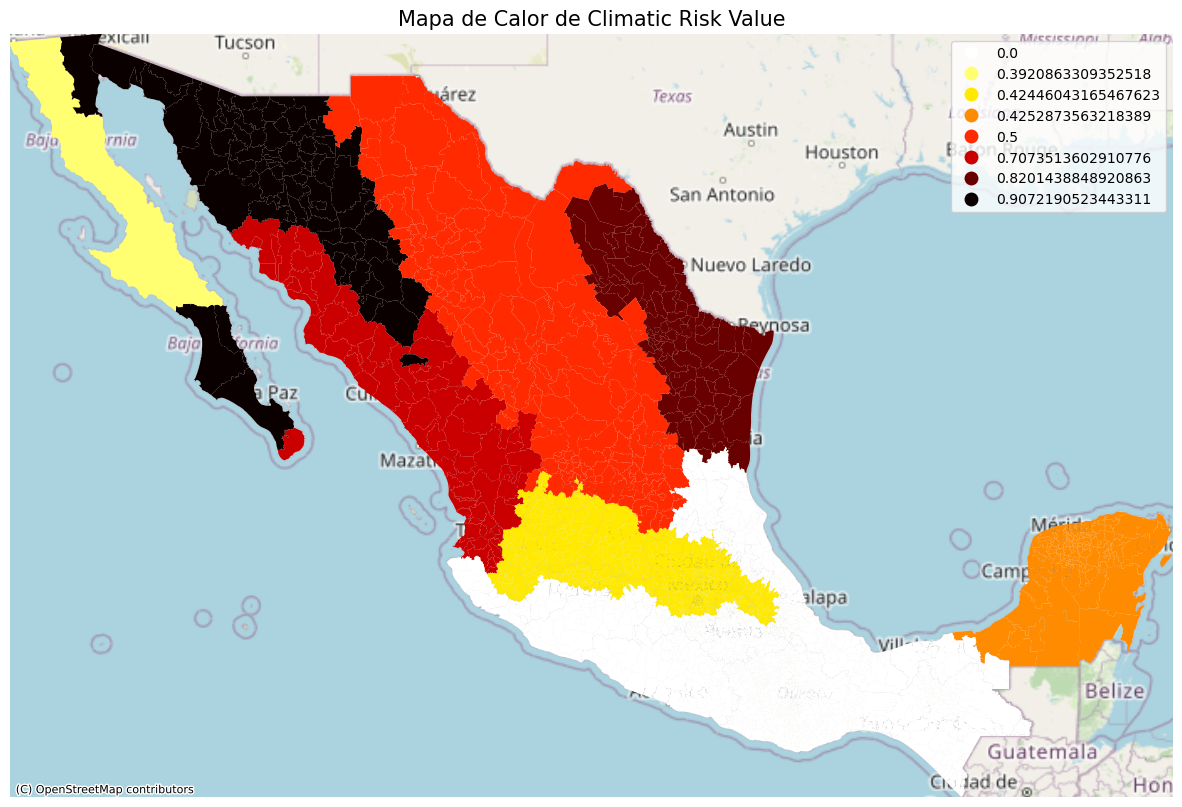

In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Asegurarse de que el GeoDataFrame 'mun_shp' tiene el CRS correcto
if mun_shp.crs is None:
    mun_shp.set_crs(epsg=4326, inplace=True)  # WGS84

# Proyectar al CRS adecuado para agregar un mapa base
mun_shp = mun_shp.to_crs(epsg=3857)  # Web Mercator

# Crear la figura y el subplot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plotear el mapa de calor usando la columna 'clim_risk_value_total'
mun_shp.plot(column='clim_risk_value_total', cmap='hot_r', legend=True, ax=ax, missing_kwds={"color": "lightgrey"})

# Agregar un mapa base
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Ajustar los límites del mapa para mostrar todos los datos
ax.set_xlim(mun_shp.total_bounds[[0, 2]])
ax.set_ylim(mun_shp.total_bounds[[1, 3]])

# Títulos y etiquetas
ax.set_title('Mapa de Calor de Climatic Risk Value', fontsize=15)
ax.set_axis_off()

# Mostrar el mapa
plt.show()


In [7]:
extclim = gpd.read_file('C:\\Users\\puria\\Downloads\\889463860136_s\\conjunto_de_datos\\datos regionales\\1series promedio\\mensuales\\promedios_regionales_mensuales_y_estacionales_tmaxmean.shp')
extclimmin = gpd.read_file('C:\\Users\\puria\\Downloads\\889463860136_s\\conjunto_de_datos\\datos regionales\\1series promedio\\mensuales\\promedios_regionales_mensuales_y_estacionales_tminmean.shp')

In [6]:
#extclim = gpd.read_file('/Users/pablouriarte/Downloads/889463860136_s/conjunto_de_datos/datos regionales/1series promedio/mensuales/promedios_regionales_mensuales_y_estacionales_tmaxmean.shp')
#extclimmin = gpd.read_file('/Users/pablouriarte/Downloads/889463860136_s/conjunto_de_datos/datos regionales/1series promedio/mensuales/promedios_regionales_mensuales_y_estacionales_tminmean.shp')

In [29]:
#extclim.to_file('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\3.datos\\2. datos_estadisticos\\3. risks\\clima\\extclim.shp')

C:\Users\puria\AppData\Local\Temp\ipykernel_19152\1958509295.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  extclim.to_file('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\3.datos\\2. datos_estadisticos\\3. risks\\clima\\extclim.shp')


In [26]:
extclim.head(10)

,R_CLIM,NR_CLIM,INICIO,FIN,AÑOS_REG,AÑOS_1,AÑOS_2,AÑOS_3,AÑOS_4,AÑOS_5,...,TMAXMEAP15,TMAXMEAP16,TMAXMEAP17,Cal_pos,Shape_Leng,Shape_Area,geometry,ITME,clim_risk_value_tmax,clim_risk_value_total
0,6,Noreste,1921,2012,92,89,89,89,89,89,...,30.9,35.1,29.1,Aproximada,34.665793,14.516201,"MULTIPOLYGON (((-10881776.031 2738152.370, -10...",1.380750,0.500000,0.820144
1,11,Península de Yucatán,1921,2012,92,84,84,84,84,84,...,34.2,33.8,31.6,Aproximada,34.536953,11.664860,"MULTIPOLYGON (((-9802456.108 2019424.639, -980...",0.869229,0.425287,0.425287
2,10,Sureste,1921,2012,92,88,88,86,88,88,...,32.7,30.9,29.8,Aproximada,16.893550,4.079795,"MULTIPOLYGON (((-10331460.948 1710078.814, -10...",-0.271858,0.000000,0.000000
3,1,Noroeste,1921,2012,92,79,79,80,78,79,...,24.1,30.4,28.0,Aproximada,39.224334,6.101859,"MULTIPOLYGON (((-12481348.245 2868037.567, -12...",-0.468596,0.000000,0.392086
4,3,Pacífico Central,1921,2012,92,91,91,91,91,91,...,30.8,33.2,30.6,Aproximada,72.623276,17.566381,"MULTIPOLYGON (((-11753177.048 2356338.098, -11...",0.633142,0.390805,0.707351
5,2,Golfo de California,1921,2012,92,90,90,90,90,90,...,28.1,34.8,29.9,Aproximada,76.067937,27.024459,"MULTIPOLYGON (((-12423376.990 2799422.037, -12...",1.262707,0.482759,0.907219
6,4,Norte,1921,2012,92,92,92,91,91,92,...,28.7,30.7,26.1,Aproximada,52.064793,43.236300,"POLYGON ((-11856788.631 3732252.769, -11856666...",-0.350553,0.000000,0.500000
7,9,Pacífico Sur,1921,2012,92,92,92,92,92,92,...,32.5,31.4,30.8,Aproximada,40.400083,8.148699,"MULTIPOLYGON (((-10704637.354 1771998.799, -10...",-0.075119,0.000000,0.000000
8,8,Centro Sur,1921,2012,92,91,91,91,91,91,...,32.5,29.4,28.4,Aproximada,34.651834,11.417995,"POLYGON ((-11461080.120 2262871.442, -11460421...",-0.862074,0.000000,0.000000
9,7,Golfo de México,1921,2012,92,92,92,92,92,92,...,31.3,31.4,28.7,Aproximada,44.809220,16.392730,"MULTIPOLYGON (((-10370208.077 2085877.739, -10...",-0.075119,0.000000,0.000000


In [27]:
extclimmin.head(10)

,R_CLIM,NR_CLIM,INICIO,FIN,AÑOS_REG,AÑOS_1,AÑOS_2,AÑOS_3,AÑOS_4,AÑOS_5,...,TMINMEAP14,TMINMEAP15,TMINMEAP16,TMINMEAP17,Cal_pos,Shape_Leng,Shape_Area,geometry,ITmE,clim_risk_value_tmin
0,6,Noreste,1921,2012,92,89,89,89,89,89,...,8.4,16.1,21.5,16.0,Aproximada,34.665793,14.516201,"MULTIPOLYGON (((-10881776.031 2738152.370, -10...",-0.353233,0.320144
1,11,Península de Yucatán,1921,2012,92,84,84,84,84,84,...,17.3,20.4,22.0,20.5,Aproximada,34.536953,11.664860,"MULTIPOLYGON (((-9802456.108 2019424.639, -980...",1.496044,0.000000
2,10,Sureste,1921,2012,92,88,88,87,88,88,...,15.8,18.7,19.5,18.4,Aproximada,16.893550,4.079795,"MULTIPOLYGON (((-10331460.948 1710078.814, -10...",1.184368,0.000000
3,1,Noroeste,1921,2012,92,79,79,80,79,79,...,6.4,9.1,15.1,12.1,Aproximada,39.224334,6.101859,"MULTIPOLYGON (((-12481348.245 2868037.567, -12...",-0.768801,0.392086
4,3,Pacífico Central,1921,2012,92,91,91,91,91,91,...,8.5,11.9,19.8,16.0,Aproximada,72.623276,17.566381,"MULTIPOLYGON (((-11753177.048 2356338.098, -11...",-0.332454,0.316547
5,2,Golfo de California,1921,2012,92,90,90,90,90,90,...,5.5,10.0,19.2,13.5,Aproximada,76.067937,27.024459,"MULTIPOLYGON (((-12423376.990 2799422.037, -12...",-0.955806,0.424460
6,4,Norte,1921,2012,92,92,92,91,92,92,...,3.4,9.6,15.2,9.8,Aproximada,52.064793,43.236300,"POLYGON ((-11856788.631 3732252.769, -11856666...",-1.392152,0.500000
7,9,Pacífico Sur,1921,2012,92,92,92,92,92,92,...,14.3,16.1,19.2,18.1,Aproximada,40.400083,8.148699,"MULTIPOLYGON (((-10704637.354 1771998.799, -10...",0.872693,0.000000
8,8,Centro Sur,1921,2012,92,91,91,91,91,91,...,11.2,15.0,16.3,14.4,Aproximada,34.651834,11.417995,"POLYGON ((-11461080.120 2262871.442, -11460421...",0.228562,0.000000
9,7,Golfo de México,1921,2012,92,92,92,92,92,92,...,14.8,18.9,20.7,18.6,Aproximada,44.809220,16.392730,"MULTIPOLYGON (((-10370208.077 2085877.739, -10...",0.976585,0.000000


In [23]:
print(extclim.columns)

Index(['R_CLIM', 'NR_CLIM', 'INICIO', 'FIN', 'AÑOS_REG', 'AÑOS_1', 'AÑOS_2',
       'AÑOS_3', 'AÑOS_4', 'AÑOS_5', 'AÑOS_6', 'AÑOS_7', 'AÑOS_8', 'AÑOS_9',
       'AÑOS_10', 'AÑOS_11', 'AÑOS_12', 'AÑOS_13', 'AÑOS_14', 'AÑOS_15',
       'AÑOS_16', 'AÑOS_17', 'TMAXMEAP_1', 'TMAXMEAP_2', 'TMAXMEAP_3',
       'TMAXMEAP_4', 'TMAXMEAP_5', 'TMAXMEAP_6', 'TMAXMEAP_7', 'TMAXMEAP_8',
       'TMAXMEAP_9', 'TMAXMEAP10', 'TMAXMEAP11', 'TMAXMEAP12', 'TMAXMEAP13',
       'TMAXMEAP14', 'TMAXMEAP15', 'TMAXMEAP16', 'TMAXMEAP17', 'Cal_pos',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


In [18]:
# Calcular estadísticas históricas para temperatura máxima
media_max = extclim['TMAXMEAP16'].mean()
desv_max = extclim['TMAXMEAP16'].std()

# Calcular el índice de temperatura máxima extrema (ITME)
extclim['ITME'] = (extclim['TMAXMEAP16'] - media_max) / desv_max

# Calcular estadísticas históricas para temperatura mínima
media_min = extclimmin['TMINMEAP14'].mean()
desv_min = extclimmin['TMINMEAP14'].std()

# Calcular el índice de temperatura mínima extrema (ITmE)
extclimmin['ITmE'] = (extclimmin['TMINMEAP14'] - media_min) / desv_min

In [24]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalización de ITME
scaler_max = MinMaxScaler(feature_range=(0, 0.5))
extclim['clim_risk_value_tmax'] = scaler_max.fit_transform(extclim[['ITME']])

# Normalización invertida de ITmE
scaler_min = MinMaxScaler(feature_range=(0, 0.5))
extclimmin['clim_risk_value_tmin'] = 0.5 - scaler_min.fit_transform(extclimmin[['ITmE']])

# Ajustar valores según las condiciones especificadas
extclim['clim_risk_value_tmax'] = np.where(extclim['ITME'] <= 0, 0, extclim['clim_risk_value_tmax'])
extclimmin['clim_risk_value_tmin'] = np.where(extclimmin['ITmE'] >= 0, 0, extclimmin['clim_risk_value_tmin'])

# Sumar los valores de riesgo climático
extclim['clim_risk_value_total'] = extclim['clim_risk_value_tmax'] + extclimmin['clim_risk_value_tmin']


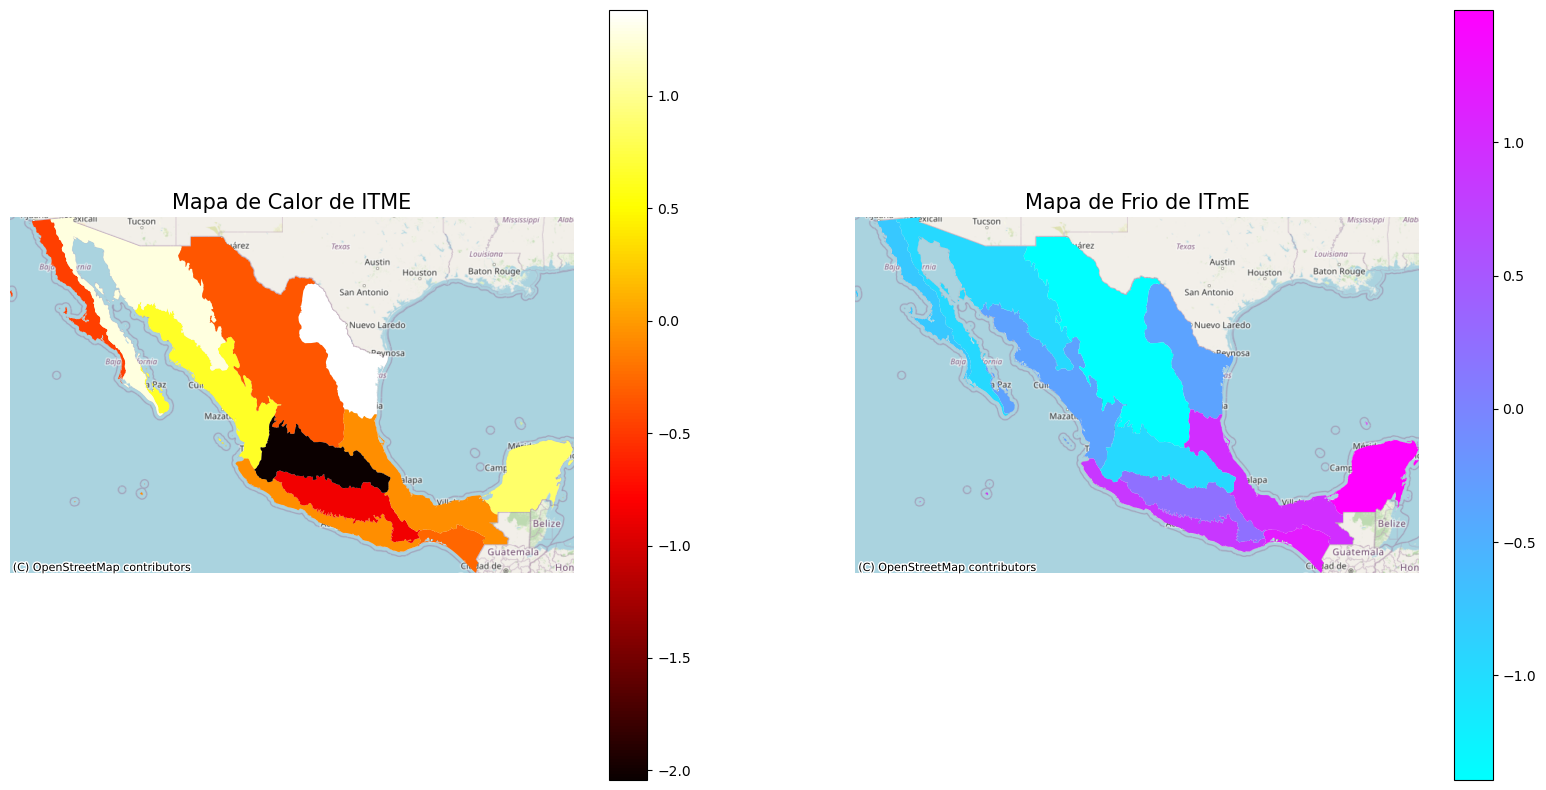

In [53]:
import matplotlib.pyplot as plt
import contextily as ctx

# Convertir a GeoDataFrame si no lo es ya
if extclim.crs is None:
    extclim.set_crs(epsg=4326, inplace=True)  # WGS84

if extclimmin.crs is None:
    extclimmin.set_crs(epsg=4326, inplace=True)  # WGS84

# Proyectar al CRS adecuado para agregar un mapa base
extclim = extclim.to_crs(epsg=3857)  # Web Mercator
extclimmin = extclimmin.to_crs(epsg=3857)  # Web Mercator

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot para ITME
extclim.plot(column='ITME', cmap='hot', legend=True, ax=ax1)
ctx.add_basemap(ax1, source=ctx.providers.OpenStreetMap.Mapnik)
ax1.set_xlim(extclim.total_bounds[[0, 2]])
ax1.set_ylim(extclim.total_bounds[[1, 3]])
ax1.set_title('Mapa de Calor de ITME', fontsize=15)
ax1.set_axis_off()

# Plot para ITmE
extclimmin.plot(column='ITmE', cmap='cool', legend=True, ax=ax2)
ctx.add_basemap(ax2, source=ctx.providers.OpenStreetMap.Mapnik)
ax2.set_xlim(extclimmin.total_bounds[[0, 2]])
ax2.set_ylim(extclimmin.total_bounds[[1, 3]])
ax2.set_title('Mapa de Frio de ITmE', fontsize=15)
ax2.set_axis_off()

# Mostrar el mapa
plt.show()


In [5]:
df_secuencias = pd.read_csv("C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\procesamiento de rutas\\Secuencias_Final.csv")
#df_secuencias = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv')

In [12]:
#arcos = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.csv")

In [8]:
#arcosgdp = gpd.read_file("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.shp")

In [17]:
#arcosgdp.to_file("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.shp")

In [9]:
#values_gdf1 = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.csv')
values_gdf1 = pd.read_csv('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\df_valores_rutas.csv')

In [6]:
#inm = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/instituciones/estaciones INM/inm_gdp.csv')
#sc = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/3.datos/1. distribution_infraestructura/2. SC Instituciones/Facility_Directory.csv')


sc = pd.read_csv('C:\\Users\\puria\\Documents\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\3.datos\\1. distribution_infraestructura\\2. SC Instituciones\\Facility_Directory.csv')
inm = pd.read_csv('C:\\Users\\puria\\Documents\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\3.datos\\1. distribution_infraestructura\\1. Estaciones INM\\inm_gdp.csv')


In [62]:
#inm_unique.to_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/instituciones/estaciones INM/inm_gdp.csv')
#df_merged.to_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/3.datos/1. distribution_infraestructura/2. SC Instituciones/Facility_Directory.csv')


In [98]:
#values_gdf1 = pd.read_csv('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\df_valores_rutas.csv')

In [104]:
#gdf.to_csv('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\df_valores_rutas.csv')
#gdf.to_file('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\df_valores_rutas.shp')

C:\Users\puria\AppData\Local\Temp\ipykernel_14728\804117778.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\df_valores_rutas.shp')


In [60]:
#sc.columns = sc.columns.str.lower()

# Cambiar el nombre de la columna 'old_name' a 'new_name'
#inm = inm.rename(columns={"id_poligono": "id_poligon"})

# Eliminar duplicados en 'df2' basándose en 'col1'
df2_unique = values_gdf1.drop_duplicates(subset=['estado'])

# Realizar el merge para agregar 'col2' de 'df2_unique' a 'df1'
df_merged = sc.merge(df2_unique[['estado', 'region']], on='estado', how='left')


In [64]:
sc

,Unnamed: 0,organization name,facility name,tipo,direccion,latitud,longitud,estado,municipio,geometry,fuente,region
0,0,NaN,Oficina de la Comisión Nacional de los Derecho...,Justicia / Derechos Humanos / Seguridad / Orga...,"Calle Cristóbal Colón 12, Fraccionamiento Cost...",16.850921,-99.850158,Guerrero,Acapulco de Juarez,POINT (-99.8501576 16.8509213),OIM Directorio Asistencia a Personas migrantes...,Pacifico
1,1,NaN,Unidad Regional Acapulco,Institucion publica / Educacion y Empleo,"Calle Laurel No. 3, Col. El Roble, Acapulco de...",16.867548,-99.873576,Guerrero,Acapulco de Juarez,POINT (-99.87357620000002 16.8675479),OIM Directorio Asistencia a Personas migrantes...,Pacifico
2,2,NaN,ACNUR Agencia de la ONU para los Regufiados,Justicia / Derechos Humanos / Seguridad / Orga...,no disponible,17.953529,-94.916254,Veracruz,Acayucan,POINT (-94.9162539 17.9535286),OIM Directorio Virtual Servicios,Golfo
3,3,NaN,Agencia Consular de El Salvador en Acayucan,Consulados,"Melchor Ocampo Norte 1212, entre 5 de mayo y G...",17.954887,-94.915622,Veracruz,Acayucan,POINT (-94.9156218 17.9548865),OIM Directorio Asistencia a Personas migrantes...,Golfo
4,4,NaN,Agencia Consular de Guatemala en Acayucan,Consulados,"Calle Independencia, esq. Altamirano, Barrio e...",17.950304,-94.908594,Veracruz,Acayucan,POINT (-94.9085939 17.9503035),OIM Directorio Asistencia a Personas migrantes...,Golfo
...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1163,NaN,Unidad Regional Zitácuaro,Institucion publica / Educacion y Empleo,"Calle Cuauhtémoc Oriente No. 17, Col. Centro, ...",19.438395,-100.353671,Michoacan,Zitacuaro,POINT (-100.353671 19.4383952),OIM Directorio Asistencia a Personas migrantes...,Pacifico
1164,1164,Casa para Menores Migrantes,Casa YMCA,Albergue y Alimentacion,"Blvd. Cuauhtémoc Sur 3170, Col. Chula vista C....",32.640054,-117.084196,Tijuana,Baja California,POINT (-117.0841955 32.6400541),OIM Directorio Asistencia a Personas migrantes...,NaN
1165,1165,NaN,Casa del Migrante para Niñas y Niños No Acompa...,"Mujer, Niñez y Juventud","Avenida Bonampak, esquina Chocol-Ha s/n, Col. ...",21.378499,-86.399385,Cancun,Quintana Roo,POINT (-86.3993846705623 21.3784987878732),OIM Directorio Asistencia a Personas migrantes...,NaN
1166,1166,NaN,Consulado General de Honduras en Veracruz,Consulados,"Blvd. Manuel Ávila Camacho 343, Col. Ricardo F...",19.195967,-96.129029,Veracruz,Veracruz,POINT (-96.1290289 19.1959673),OIM Directorio Asistencia a Personas migrantes...,Golfo


In [48]:
inm.head(1)

,Unnamed: 0,name,tipo,sub_tipo,latitud,longitud,ciudad,estado,id_poligon,region
0,0,Acayucan Estacion Migratoria,INM,Estacion Migratoria INM,18.001851,-94.921076,Acayucan,Veracruz,PG1378,Golfo


In [57]:
# Agrupar por las dos columnas y contar el número de ocurrencias de cada combinación
combination_counts = values_gdf1.groupby(['estado', 'region']).size().reset_index(name='counts')


In [59]:
#combination_counts

In [7]:
import pandas as pd
import geopandas as gpd
from shapely import wkt

# Convertir la columna 'geometry' de WKT a objetos geométricos
#values_gdf1['geometry'] = values_gdf1['geometry'].apply(wkt.loads)

# Crear un GeoDataFrame a partir del DataFrame
#gdf = gpd.GeoDataFrame(values_gdf1, geometry='geometry')

# Definir el sistema de referencia espacial (CRS) si es necesario
#gdf.set_crs(epsg=4326, inplace=True)




In [107]:
# Ejemplo de DataFrame
data = 'PG1072'

df_filtrado = gdf[gdf['id_poligon'] == data]

# Sumar las columnas específicas
suma_columna1 = df_filtrado['eventos'].sum()




region: Centro
IMT Encounter Events: 4067
(Facilities) INM: 1
(Facilities) SC: 10

In [8]:
df = pd.DataFrame(values_gdf1)

# Filtrar el DataFrame para encontrar la fila con 'C-PG1072-1' en la columna 'codigo_uni'
filtro = 'C-PG1072-1'
df_filtrado = df[df['codigo_uni'] == filtro]

# Actualizar el valor de la columna 'geometry' en el DataFrame filtrado
#nuevo_valor_geometry = 'POINT (-100.9755186563027 22.154834238876298)' 
#df_filtrado.loc[df_filtrado['codigo_uni'] == filtro, 'geometry'] = nuevo_valor_geometry

# Reflejar el cambio en el DataFrame original
#df.loc[df['codigo_uni'] == filtro, 'geometry'] = nuevo_valor_geometry

# Mostrar el DataFrame actualizado
#print(df)

In [18]:
import pandas as pd

# Crear un DataFrame con las columnas 'ciudad' y 'region' de values_gdf1
#ciudad_region_df = values_gdf1[['ciudad', 'region','eventos']]

# Renombrar la columna 'ciudad' a 'ciudad_destino' para que coincida con el DataFrame 'arcos'
ciudad_region_df.rename(columns={'ciudad': 'ciudad_destino'}, inplace=True)

# Hacer un merge de 'arcos' con 'ciudad_region_df' basado en la columna 'ciudad_destino'
arcos = arcos.merge(ciudad_region_df, on='ciudad_destino', how='left')

# Verificar los resultados
print(arcos.head())


   Unnamed: 0            Arc        ciudad_origen       ciudad_destino  \
0           0  PG1529-PG1530    Suchiate, Chiapas   Tapachula, Chiapas   
1           1  PG1530-PG1491   Tapachula, Chiapas  Mapastepec, Chiapas   
2           2  PG1491-PG1492  Mapastepec, Chiapas  Pijijiapan, Chiapas   
3           3  PG1492-PG1453  Pijijiapan, Chiapas     Arriaga, Chiapas   
4           4  PG1453-PG1414     Arriaga, Chiapas    Chahuites, Oaxaca   

   eventos_arco                                           geometry distance  \
0        124475  LINESTRING (-92.23982 14.63441, -92.23938 14.6...  35.6 km   
1         98522  LINESTRING (-92.26123 14.90446, -92.26156 14.9...   103 km   
2         11333  LINESTRING (-92.8986 15.44007, -92.89826 15.44...  45.3 km   
3         31136  LINESTRING (-93.20811 15.68506, -93.20779 15.6...   101 km   
4         19893  LINESTRING (-93.90072 16.23439, -93.90258 16.2...  36.4 km   

           duration  distance_km  duration_min region  
0    8 hours 8 mins     

C:\Users\puria\AppData\Local\Temp\ipykernel_14516\1758571393.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ciudad_region_df.rename(columns={'ciudad': 'ciudad_destino'}, inplace=True)


In [53]:
# Leer los datos del CSV asegurándonos de que la columna 'geometry' se lea como texto
#arcos = pd.read_csv("C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\procesamiento de rutas\\arcos\\arcos_rutas_a_pie.csv", dtype={'geometry': str})

# Convertir la columna 'geometry' a objetos LineString
arcos['geometry'] = arcos['geometry'].apply(wkt.loads)

# Convertir el DataFrame 'arcos' a un GeoDataFrame
arcos_gdf = gpd.GeoDataFrame(arcos, geometry='geometry')

# Definir el sistema de coordenadas (CRS) si es necesario
arcos_gdf.set_crs(epsg=4326, inplace=True)

# Guardar el GeoDataFrame como un archivo shapefile
#arcos_gdf.to_file("C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\procesamiento de rutas\\arcos\\arcos_rutas_a_pie.shp")


C:\Users\puria\AppData\Local\Temp\ipykernel_14516\373666111.py:19: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  arcos_gdf.to_file("C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\procesamiento de rutas\\arcos\\arcos_rutas_a_pie.shp")


In [42]:
#arcos.to_csv("C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\procesamiento de rutas\\arcos\\arcos_rutas_a_pie.csv")

In [53]:
#values_gdf2.to_file('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.shp')

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_9987/4127702269.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  values_gdf2.to_file('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.shp')


In [1]:
df_secuencias = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv")

NameError: name 'pd' is not defined

In [76]:
#df_secuencias.to_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv")

In [49]:
df_secuencias.head(1)

,Unnamed: 0,filtered_secuencias,last_five_id,arc_sequences,start_id,end_id,region,suma_arcos,suma_dist
0,0,"PG1529, PG1530, PG1491, PG1492, PG1453, PG1414...","PG499, PG460, PG383, PG268, PG190","PG1529-PG1530, PG1530-PG1491, PG1491-PG1492, P...",PG1529,PG190,Pacifico,166373.0,5339.0


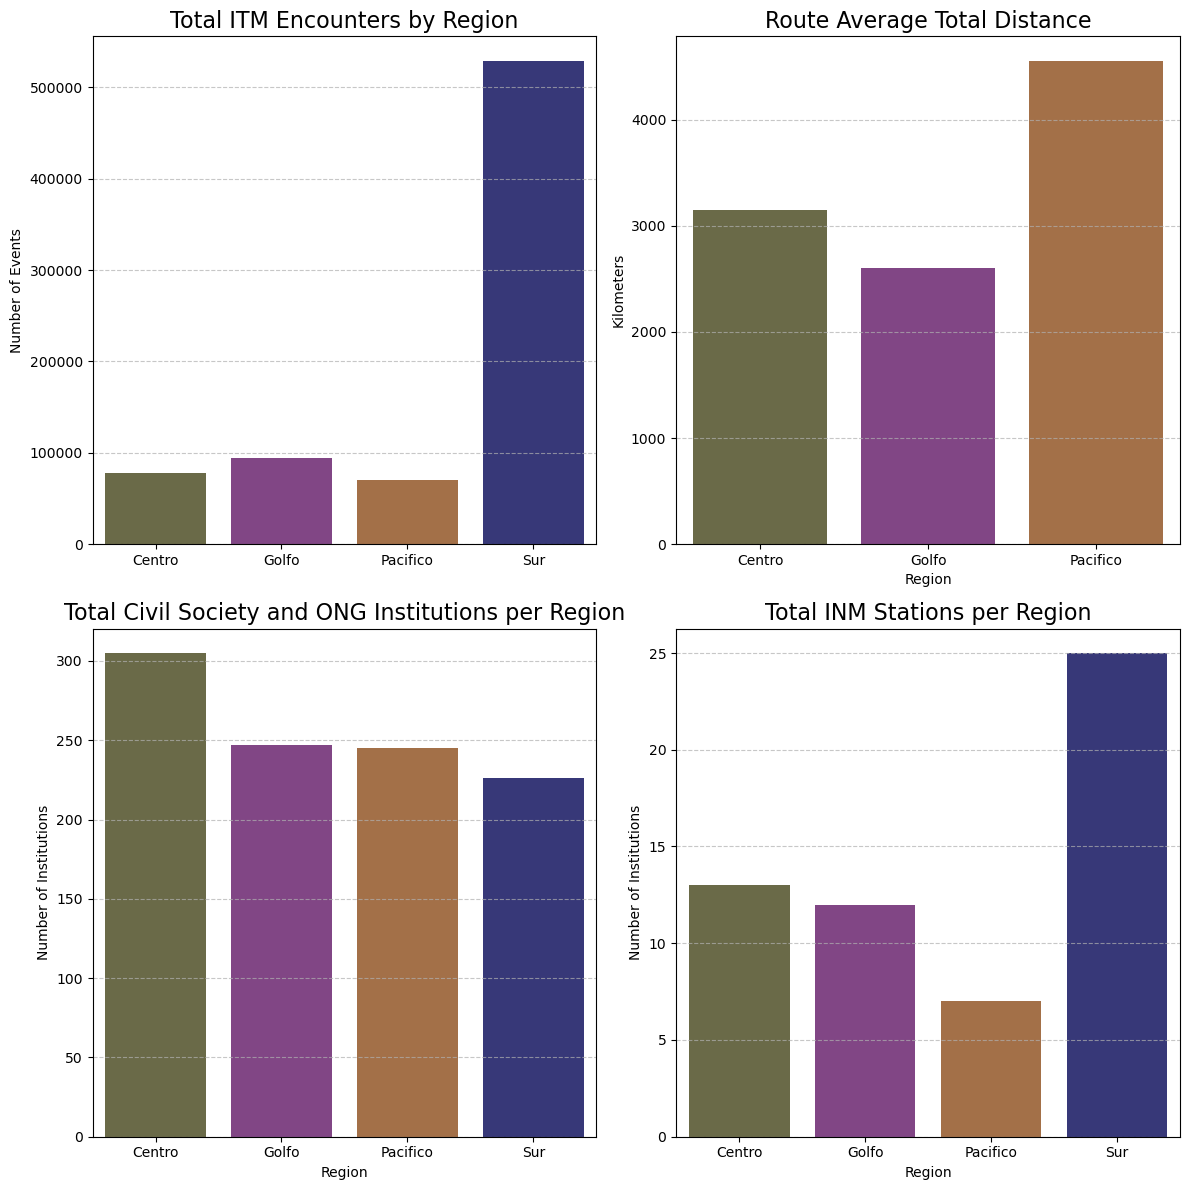

C:\Users\puria\AppData\Local\Temp\ipykernel_9360\2383559589.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\puria\AppData\Local\Temp\ipykernel_9360\2383559589.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\puria\AppData\Local\Temp\ipykernel_9360\2383559589.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
C:\Users\puria\AppData\Local\Temp\ipykernel_9360\2383559589.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=

<Figure size 640x480 with 0 Axes>

In [12]:
# Definir los colores pastel con transparencia para cada región
colors = {
    'Golfo': (138/255, 59/255, 143/255, 0.6),    # Morado
    'Centro': (112/255, 111/255, 66/255, 0.6),   # Verde oliva
    'Pacifico': (178/255, 110/255, 57/255, 0.6), # Naranja
    'Sur': (44/255, 46/255, 131/255, 0.6)        # Azul oscuro
}

# Convertir colores a una paleta de seaborn
palette = [colors[key] for key in sorted(colors.keys())]

# Crear una figura con 4 subplots (2x2)
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Gráfica 1: Total ITM Encounters by Region
events_by_region = values_gdf1.groupby('region')['eventos'].sum().reset_index()
sns.barplot(ax=axs[0, 0], x='region', y='eventos', data=events_by_region, palette=palette)
axs[0, 0].set_title('Total ITM Encounters by Region', fontsize=16)
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Number of Events', fontsize=10)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfica 2: Route Average Distance
arcos_by_region = df_secuencias.groupby('region')['suma_dist'].mean().reset_index()
sns.barplot(ax=axs[0, 1], x='region', y='suma_dist', data=arcos_by_region, palette=palette)
axs[0, 1].set_title('Route Average Total Distance', fontsize=16)
axs[0, 1].set_xlabel('Region', fontsize=10)
axs[0, 1].set_ylabel('Kilometers')
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfica 3: SC
scbyregion = sc.groupby('region').size().reset_index(name='count')
sns.barplot(ax=axs[1, 0], x='region', y='count', data=scbyregion, palette=palette)
axs[1, 0].set_title('Total Civil Society and ONG Institutions per Region', fontsize=16)
axs[1, 0].set_xlabel('Region', fontsize=10)
axs[1, 0].set_ylabel('Number of Institutions', fontsize=10)
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfica 4: INM
inmbyregion = inm.groupby('region').size().reset_index(name='count')
sns.barplot(ax=axs[1, 1], x='region', y='count', data=inmbyregion, palette=palette)
axs[1, 1].set_title('Total INM Stations per Region', fontsize=16)
axs[1, 1].set_xlabel('Region', fontsize=10)
axs[1, 1].set_ylabel('Number of Institutions', fontsize=10)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el layout para que no se solapen las gráficas
plt.tight_layout()
plt.show()



# Ajustar los ticks de los ejes
for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


# Ajustar el layout para que no haya solapamiento
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# Mostrar el gráfico
plt.show()

In [13]:
values_gdf1

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,nommun,estado,region,id_poligon,codigo_uni,eventos,inm_30km,...,distancia_metros,distancia_km,max_vul2r1_normalized,max_vul2r2_normalized,max_vul2r3_normalized,max_vul2r4_normalized,inm_30km_adjusted,log_eventos_per_inm_30km,norm_log_eventos_per_inm_30km,latitud
0,0,0,0,"Tapachula, Chiapas",Chiapas,Sur,PG1530,S-PG1530-8,70665.0,2,...,15537.0,15.537,0.280689,0.440925,0.237571,0.295621,3,10.067136,0.882435,14.904291
1,1,1,1,"Huimanguillo, Tabasco",Tabasco,Sur,PG1456,G-PG1456-1,86684.0,0,...,325527.0,325.527,1.000000,1.000000,0.877758,0.499600,1,11.370036,1.000000,17.762097
2,2,2,2,"Centro, Tabasco",Tabasco,Sur,PG1495,G-PG1495-6,74160.0,1,...,224089.0,224.089,0.626950,0.617321,0.549094,0.269827,2,10.520860,0.923376,18.027159
3,3,3,3,"Acayucan, Veracruz",Veracruz,Golfo,PG1378,G-PG1378-4,36446.0,1,...,448302.0,448.302,NaN,NaN,NaN,NaN,2,9.810495,0.859277,17.948786
4,4,4,4,"Tenosique, Tabasco",Tabasco,Sur,PG1572,G-PG1572-3,39620.0,1,...,42334.0,42.334,0.437746,0.713052,0.419243,0.248657,2,9.893993,0.866811,17.470713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,384,384,384,"San Juan Huactzinco, Tlaxcala",Tlaxcala,Centro,PG1224,C-PG1224-2,1.0,2,...,879483.0,879.483,NaN,NaN,NaN,NaN,3,0.287682,0.000000,19.232933
385,385,385,385,"Amaxac de Guerrero, Tlaxcala",Tlaxcala,Centro,PG1224,C-PG1224-12,1.0,1,...,898212.0,898.212,NaN,NaN,NaN,NaN,2,0.405465,0.010628,19.348889
386,386,386,386,"Chicomuselo, Chiapas",Chiapas,Sur,PG1531,S-PG1531-1,NaN,0,...,85686.0,85.686,NaN,NaN,NaN,NaN,1,NaN,NaN,15.793552
387,387,387,387,"Carlos A. Carrillo, Veracruz",Veracruz,Golfo,PG1339,G-PG1339-4,1.0,0,...,544400.0,544.400,NaN,NaN,NaN,NaN,1,0.693147,0.036587,18.328361


## secuencias incorrectas, arregladon 12 de mayo

In [30]:
mun_shp = gpd.read_file('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\areas\\municipiosrisk1.shp')

C:\Users\puria\AppData\Local\Temp\ipykernel_9360\2909595898.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  mun_shp.to_file('C:\\Users\\puria\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\areas\\municipiosrisk1.shp')


In [22]:
mun_shp.head(60)

,nommun,cvemun,nomedo,area,R1,R2,R3,R4,R4pt,geometry,region
0,"Aguascalientes, Aguascalientes",1001,Aguascalientes,1168.762384,0.360084,0.372695,0.117251,0.662296,0.000458,"POLYGON ((-11370403.590 2520317.662, -11368883...",Centro
1,"Asientos, Aguascalientes",1002,Aguascalientes,547.762077,0.019696,0.011381,0.017855,0.745202,0.000515,"POLYGON ((-11368305.122 2546014.561, -11367916...",Centro
2,"Calvillo, Aguascalientes",1003,Aguascalientes,931.300088,0.019349,0.013107,0.013835,0.708078,0.000489,"POLYGON ((-11444356.824 2510725.426, -11444212...",Centro
3,"Cosio, Aguascalientes",1004,Aguascalientes,128.907513,0.012770,0.010345,0.012474,0.704691,0.000487,"POLYGON ((-11387740.145 2566722.259, -11387556...",Centro
4,"El Llano, Aguascalientes",1010,Aguascalientes,500.861359,0.012770,0.012417,0.011113,0.710027,0.000491,"POLYGON ((-11365483.996 2514328.561, -11364488...",Centro
5,"Jesus Maria, Aguascalientes",1005,Aguascalientes,499.207990,0.041511,0.013453,0.026453,0.697694,0.000482,"POLYGON ((-11400837.207 2516051.901, -11399144...",Centro
6,"Pabellon de Arteaga, Aguascalientes",1006,Aguascalientes,199.342229,0.021427,0.012762,0.015381,0.702479,0.000486,"POLYGON ((-11377087.802 2530916.387, -11377135...",Centro
7,"Rincon de Romos, Aguascalientes",1007,Aguascalientes,372.937842,0.023158,0.012762,0.014453,0.742308,0.000513,"POLYGON ((-11382606.455 2556483.698, -11382217...",Centro
8,"San Francisco de los Romo, Aguascalientes",1011,Aguascalientes,134.074435,0.029738,0.013107,0.020206,0.699417,0.000483,"POLYGON ((-11375973.967 2519429.178, -11375646...",Centro
9,"San Jose de Gracia, Aguascalientes",1008,Aguascalientes,856.214195,0.012078,0.011036,0.010680,0.748600,0.000517,"POLYGON ((-11423205.269 2546540.540, -11422408...",Centro


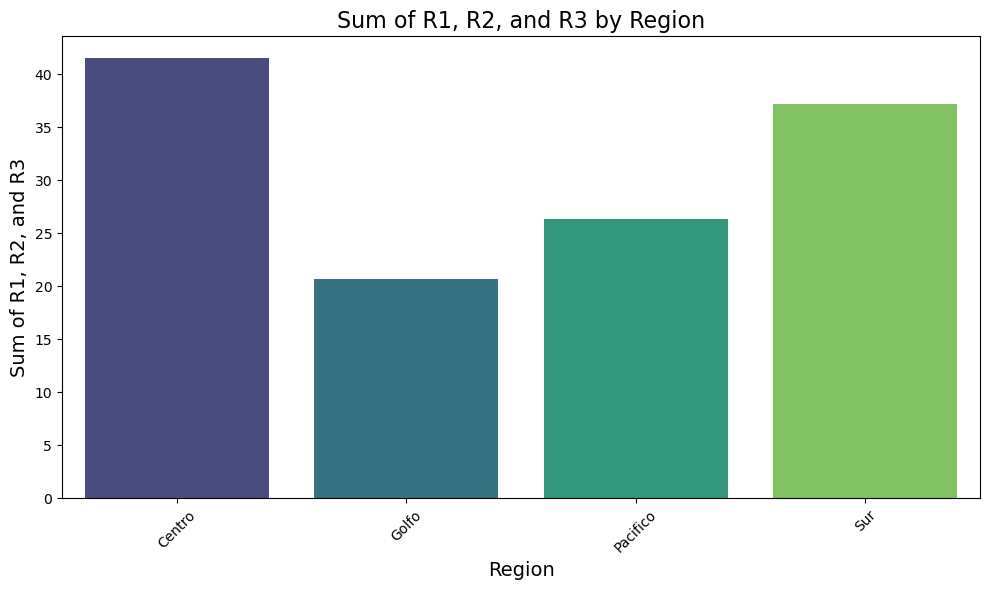

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column that is the sum of R1, R2, and R3
mun_shp['sum_R1_R2_R3'] = mun_shp[['R1', 'R2', 'R3']].sum(axis=1)

# Group by region and calculate the sum of the new column
region_sum = mun_shp.groupby('region')['sum_R1_R2_R3'].sum().reset_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='sum_R1_R2_R3', data=region_sum, palette='viridis')

# Add titles and labels
plt.title('Sum of R1, R2, and R3 by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Sum of R1, R2, and R3', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()

# Show the plot
plt.show()



NameError: name 'df_secuencias' is not defined

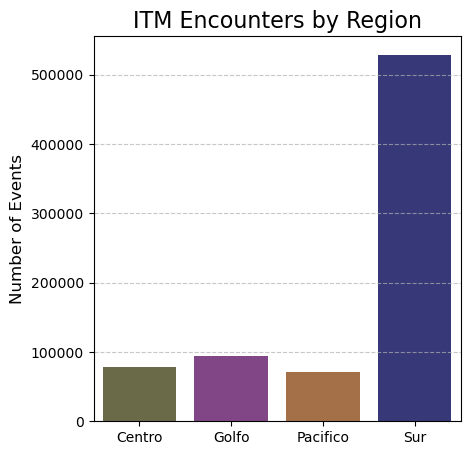

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir los colores pastel con transparencia para cada región
colors = {
    'Golfo': (138/255, 59/255, 143/255, 0.6),    # Morado
    'Centro': (112/255, 111/255, 66/255, 0.6),   # Verde oliva
    'Pacifico': (178/255, 110/255, 57/255, 0.6), # Naranja
    'Sur': (44/255, 46/255, 131/255, 0.6)        # Azul oscuro
}

# Convertir colores a una paleta de seaborn
palette = [colors[key] for key in sorted(colors.keys())]

# Crear una figura con subplots utilizando GridSpec
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 3, wspace=0.4, hspace=0.4)

# Gráfica 1: Total ITM Encounters by Region
events_by_region = values_gdf1.groupby('region')['eventos'].sum().reset_index()
ax0 = fig.add_subplot(gs[0, 0])
sns.barplot(ax=ax0, x='region', y='eventos', data=events_by_region, palette=palette)
ax0.set_title('ITM Encounters by Region', fontsize=16)
ax0.set_xlabel('')
ax0.set_ylabel('Number of Events', fontsize=12)
ax0.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfica 2: Route Average Distance
arcos_by_region = df_secuencias.groupby('region')['suma_dist'].mean().reset_index()
ax1 = fig.add_subplot(gs[0, 1])
sns.barplot(ax=ax1, x='region', y='suma_dist', data=arcos_by_region, palette=palette)
ax1.set_title('Average Total Distance', fontsize=16)
ax1.set_xlabel('Region', fontsize=12)
ax1.set_ylabel('Kilometers', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfica 3: SC
scbyregion = sc.groupby('region').size().reset_index(name='count')
ax2 = fig.add_subplot(gs[0, 2])
sns.barplot(ax=ax2, x='region', y='count', data=scbyregion, palette=palette)
ax2.set_title('Total Civil Society and ONG Institutions per Region', fontsize=16)
ax2.set_xlabel('Region', fontsize=12)
ax2.set_ylabel('Number of Institutions', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfica 4: INM
inmbyregion = inm.groupby('region').size().reset_index(name='count')
ax3 = fig.add_subplot(gs[1, 0])
sns.barplot(ax=ax3, x='region', y='count', data=inmbyregion, palette=palette)
ax3.set_title('Total INM Stations per Region', fontsize=16)
ax3.set_xlabel('Region', fontsize=12)
ax3.set_ylabel('Number of Institutions', fontsize=12)
ax3.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfica 5: Sum of R1, R2, and R3 by Region
mun_shp['sum_R1_R2_R3'] = mun_shp[['R1', 'R2', 'R3']].sum(axis=1)
region_sum = mun_shp.groupby('region')['sum_R1_R2_R3'].sum().reset_index()
ax4 = fig.add_subplot(gs[1, 1])
sns.barplot(ax=ax4, x='region', y='sum_R1_R2_R3', data=region_sum, palette=palette)
ax4.set_title('Accumulated Non Climatic Risk', fontsize=16)
ax4.set_xlabel('Region', fontsize=12)
ax4.set_ylabel('Risk', fontsize=12)
ax4.grid(axis='y', linestyle='--', alpha=0.7)

# Eliminar el último subplot (espacio vacío)
fig.delaxes(gs[1, 2])

# Ajustar los ticks de los ejes
for ax in [ax0, ax1, ax2, ax3, ax4]:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

# Ajustar el layout para que no haya solapamiento
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

# Guardar la gráfica como archivo de imagen
g.savefig("bars.png")

# Mostrar el gráfico
plt.show()


In [ ]:
combined_rutas

### generacion de arcos

In [ ]:
values_df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.csv')


In [ ]:
import pandas as pd
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim
from unidecode import unidecode
import unidecode
import numpy as np
from shapely.geometry import Point, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
#arc_df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv')

### dato de distancias a pie y tiempo

In [ ]:
def calculate_totals(row, df):
    total_distance = 0
    total_duration = 0
    # Iterate through each tuple in the transformed sequences
    for pair in row['Transformed_Sequences']:
        # Filter sorted_df for rows matching the current pair
        matching_rows = df[df['Node_Pair'] == pair]
        total_distance += matching_rows['Distance_km'].sum()
        total_duration += matching_rows['Duration_hr'].sum()
    return pd.Series([total_distance, total_duration])

# Apply the function to df_unique
df_unique[['Total_Distance_km', 'Total_Duration_hr']] = df_unique.apply(calculate_totals, args=(sorted_df,), axis=1)


###
tengo que eliminar grids que no son nodos, para esto podemos tomar secuencias_diferentes y df valores, y de secuencias diferentes, quitar todas los codigos de grid que no tengan un valor en df_valores. b)buscar duplicados c) sacar arcos, d) correr distancias y tiempo.

notas:



In [ ]:
combined_rutas = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv")

In [ ]:
valid_ids = set(values_df['ID_Poligono'])

In [ ]:
combined_rutas.head(9)

In [ ]:
# Check for duplicates across all columns
duplicates = combined_rutas.duplicated(keep=False)  # `keep=False` marks all duplicates

# Count total duplicates
total_duplicates = duplicates.sum()

# Print the number of duplicate rows
print(f"Total duplicate rows: {total_duplicates}")

# Optionally, display the duplicate rows
if total_duplicates > 0:
    print("Duplicate rows:")
    print(combined_rutas[duplicates])


In [ ]:
#combined_rutas.to_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Diferentes_1.csv')


### final de filtrado de secuencias

## toca extraer de nuevo los diferentes arcos posibles

In [ ]:
from itertools import combinations

def generate_pairwise_combinations(ids):
    # Split the IDs string into a list if not already a list
    id_list = ids.split(', ') if isinstance(ids, str) else ids
    # Generate all pairwise combinations for the last five IDs
    pairwise_combinations = list(combinations(id_list, 2))
    return pairwise_combinations


In [ ]:
# Split the 'Arc_Sequences' into lists of arcs and explode into separate rows
arc_df12 = combined_rutas['Arc_Sequences'].str.split(', ').explode().reset_index(drop=True).to_frame()

# Rename the column to a more descriptive name
arc_df12.columns = ['Arc']


In [ ]:
# Check for duplicates across all columns
duplicates = arc_df12.duplicated(keep=False)  # `keep=False` marks all duplicates

# Count total duplicates
total_duplicates = duplicates.sum()

# Print the number of duplicate rows
print(f"Total duplicate rows: {total_duplicates}")

# Optionally, display the duplicate rows
if total_duplicates > 0:
    print("Duplicate rows:")
    print(arc_df12[duplicates])


In [ ]:
# Remove duplicates and keep the first occurrence
arc_df12 = arc_df12.drop_duplicates()

# Print the number of rows after removing duplicates
print(f"Total rows after removing duplicates: {len(arc_df12)}")


In [ ]:
values_df

In [ ]:
arc_df12[['From_Node', 'To_Node']] = arc_df12['Arc'].str.split('-', expand=True)


### se tiene que filtrar los datos de values para que no se repitan los arcos por cada ciudad en cada grid



In [ ]:
# Filtrar el DataFrame para quedarse con las filas que tengan el máximo valor de 'eventos' para cada 'ID_Poligono'
filtered_values_df = values_df.loc[values_df.groupby('ID_Poligono')['eventos'].idxmax()]

# Mostrar el DataFrame filtrado
print(filtered_values_df)

In [ ]:
# Merge details for From_Node
arc_df12 = arc_df12.merge(filtered_values_df[['ID_Poligono', 'ciudad', 'latitud', 'longitud', 'eventos']], how='left', left_on='From_Node', right_on='ID_Poligono')
arc_df12.rename(columns={
    'ciudad': 'ciudad_origen',
    'latitud': 'latitud_from',
    'longitud': 'longitud_from',
    'eventos': 'eventos_from'
}, inplace=True)
arc_df12.drop('ID_Poligono', axis=1, inplace=True)

# Merge details for To_Node
arc_df12 = arc_df12.merge(filtered_values_df[['ID_Poligono', 'ciudad', 'latitud', 'longitud', 'eventos']], how='left', left_on='To_Node', right_on='ID_Poligono')
arc_df12.rename(columns={
    'ciudad': 'ciudad_destino',
    'latitud': 'latitud_to',
    'longitud': 'longitud_to',
    'eventos': 'eventos_to'
}, inplace=True)
arc_df12.drop('ID_Poligono', axis=1, inplace=True)


In [ ]:
# Create coordinates
arc_df12['origen_xy'] = arc_df12['latitud_from'].astype(str) + ', ' + arc_df12['longitud_from'].astype(str)
arc_df12['destino_xy'] = arc_df12['latitud_to'].astype(str) + ', ' + arc_df12['longitud_to'].astype(str)

# Calculate total events
arc_df12['eventos_arco'] = arc_df12['eventos_from'] + arc_df12['eventos_to']


In [ ]:
arc_df12

In [ ]:

#arc_df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv')

combined_rutas = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/Secuencias_Final.csv")



In [ ]:
# Specify the path where you want to save the CSV file
output_path = '/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv'

# Save the DataFrame to a CSV file at the specified path
arc_df12.to_csv(output_path, index=False)


notas:

la distancia juega un papel impportante, y bien podria ser parte de cualquiera de las dos metricas de vulnerabilidad por capacidad institucional, dado la presencia de asistencia en el centroide sobre la distancia entre un punto y otro

la presencia de asistencia a lo largo del arco total

### continuamos:

en este putno debemos tener nuestras df:

rutas_combinaciones[filtered secuences, arc codes que lo integran,]

arc_df[arcs, ciudad origen, ciudad destino, coords origen_xy, destino_xy, eventos arco] 

y vamos a sacar la polilínea codificada, tiempo y distancia. listo para meter a arcgis




## rutas polygonos arcos

Consulta a la API de Google Maps: Para cada par de puntos de origen y destino, realizar una consulta para obtener la ruta a pie, incluyendo la polilínea codificada, tiempo y distancia.


Decodificar y almacenar las polilíneas: Decodificar cada polilínea codificada obtenida y almacenarla en tu DataFrame.


Convertir a GeoDataFrame: Convertir el DataFrame actualizado en un GeoDataFrame.


Guardar y visualizar: Opcionalmente, guardar el GeoDataFrame y preparar todo para visualización en ArcGIS Pro.

In [ ]:
df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv')

In [ ]:
import pandas as pd
import requests
import polyline
from shapely.geometry import LineString
import geopandas as gpd

In [ ]:
import requests
import pandas as pd
from shapely.geometry import LineString
import googlemaps
from shapely import wkt

In [ ]:
# Configuración de API Key
api_key = 'xxx'

In [ ]:
import requests
import pandas as pd
from shapely.geometry import LineString
import polyline

# Función para convertir distancias a kilómetros
def convert_distance_to_km(distance):
    if distance is None:
        return None
    if 'km' in distance:
        return float(distance.replace(' km', ''))
    elif 'mi' in distance:
        return float(distance.replace(' mi', '')) * 1.60934  # Conversión de millas a kilómetros
    else:
        return None

# Función para convertir duraciones a minutos
def convert_duration_to_minutes(duration):
    if duration is None:
        return None
    days = 0
    hours = 0
    minutes = 0
    if 'day' in duration:
        days_part = duration.split(' day')[0]
        days = int(days_part.split()[-1])
        duration = duration.split(' day')[1]
    if 'hour' in duration:
        hours_part = duration.split(' hour')[0]
        hours = int(hours_part.split()[-1])
        duration = duration.split(' hour')[1]
    if 'min' in duration:
        minutes_part = duration.split(' min')[0]
        minutes = int(minutes_part.split()[-1])
    return days * 24 * 60 + hours * 60 + minutes

# Función para obtener la ruta y la polilínea, y convertir las distancias y duraciones a formatos numéricos
def obtener_ruta_y_polilinea(row, api_key):
    #base_url = "https://maps.googleapis.com/maps/api/directions/json"
    params = {
        'origin': f"{row['latitud_from']},{row['longitud_from']}",  # Asegúrate de que los nombres de columnas coincidan
        'destination': f"{row['latitud_to']},{row['longitud_to']}",
        'mode': 'walking',  # Modo a pie
        'key': api_key
    }
    response = requests.get(base_url, params=params)
    result = response.json()

    if result['status'] == 'OK':
        polyline_encoded = result['routes'][0]['overview_polyline']['points']
        distancia = result['routes'][0]['legs'][0]['distance']['text']
        duracion = result['routes'][0]['legs'][0]['duration']['text']
        puntos = polyline.decode(polyline_encoded)
        geometry = LineString(puntos)

        # Convertir distancia y duración a formatos numéricos
        distancia_km = convert_distance_to_km(distancia)
        duracion_min = convert_duration_to_minutes(duracion)

        return geometry.wkt, distancia, duracion, distancia_km, duracion_min  # Devolver como WKT
    else:
        return None, None, None, None, None

# Aplicar a cada fila del DataFrame y expandir los resultados en nuevas columnas
df[['geometry', 'distance', 'duration', 'distance_km', 'duration_min']] = df.apply(
    lambda row: obtener_ruta_y_polilinea(row, api_key), axis=1, result_type='expand'
)

# Mostrar el DataFrame para verificar los resultados
#print(df)




In [ ]:
# Elimina las columnas existentes
#df = df.drop(columns=['geometry'])#,'distance', 'duration', 'distance_km', 'duration_min'])

In [ ]:
# Lista de columnas para mantener
columnas_para_mantener = ['Arc', 'ciudad_origen', 'ciudad_destino', 'eventos_arco', 'geometry', 'distance', 'duration', 'distance_km', 'duration_min']

# Eliminar todas las columnas que no están en la lista de columnas para mantener
df_filtrado = df[columnas_para_mantener]


In [ ]:
arc_df = df_filtrado

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(arc_df['distance_km'], arc_df['duration_min'], alpha=0.5)
plt.title('Scatter Plot of Distance vs. Duration')
plt.xlabel('Distance in Kilometers')
plt.ylabel('Duration in Hours')
plt.grid(True)
plt.show()

In [ ]:
#### Calculate IQR
Q1 = arc_df[['distance_km', 'duration_min']].quantile(0.25)
Q3 = arc_df[['distance_km', 'duration_min']].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those beyond 1.5 times the IQR from the quartiles
outliers = arc_df[((arc_df['distance_km'] < (Q1['distance_km'] - 1.5 * IQR['distance_km'])) | (arc_df['distance_km'] > (Q3['distance_km'] + 1.5 * IQR['distance_km'])) |
                   (arc_df['duration_min'] < (Q1['duration_min'] - 1.5 * IQR['duration_min'])) | (arc_df['duration_min'] > (Q3['duration_min'] + 1.5 * IQR['duration_min'])))]
print("Detected Outliers:")
print(outliers[['Arc', 'distance_km', 'duration_min']])

In [ ]:
arc_df

In [ ]:
#df_filtrado.to_file("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.geojson", driver='GeoJSON')
#arc_df.to_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.csv")


In [ ]:
# Convertir la columna 'geometry' de WKT a objetos shapely
arc_df['geometry'] = arc_df['geometry'].apply(wkt.loads)

# Convertir el DataFrame en un GeoDataFrame
arc_gdf = gpd.GeoDataFrame(arc_df, geometry='geometry')

# Definir el sistema de coordenadas WGS84
arc_gdf.set_crs(epsg=4326, inplace=True)

# Guardar como shapefile
#arc_gdf.to_file("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.shp")

In [ ]:
arc_df= pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.csv")

In [ ]:
# Verificar que todos los valores en la columna 'geometry' son válidos
def is_valid_linestring(geometry):
    try:
        # Verificar si ya es un objeto LineString
        if isinstance(geometry, LineString):
            return geometry.is_valid
        # Convertir el valor de geometry a un objeto shapely
        geom = wkt.loads(geometry)
        return geom.is_valid
    except Exception as e:
        print(f"Error en la geometría: {e}")
        return False

arc_df['valid_geometry'] = arc_df['geometry'].apply(is_valid_linestring)

# Filtrar filas con geometrías no válidas
invalid_geometries = arc_df[~arc_df['valid_geometry']]

# Mostrar filas con geometrías no válidas
print("Filas con geometrías no válidas:")
print(invalid_geometries)

# Convertir la columna 'geometry' a objetos shapely si aún no lo están
def convert_to_linestring(geometry):
    if isinstance(geometry, LineString):
        return geometry
    return wkt.loads(geometry)

arc_df['geometry'] = arc_df['geometry'].apply(convert_to_linestring)

# Crear un GeoDataFrame a partir del DataFrame
gdf = gpd.GeoDataFrame(arc_df, geometry='geometry')

# Comprobar si hay geometrías inválidas en el GeoDataFrame
invalid_gdf = gdf[~gdf.is_valid]

# Mostrar filas con geometrías inválidas en el GeoDataFrame
print("Filas con geometrías inválidas en el GeoDataFrame:")
print(invalid_gdf)

# Intentar trazar las geometrías
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', edgecolor='black')
plt.show()

#### notas
las coordenadas de las rutas (polyline) salen al reves lol
estan al reves lol


## segmentacion y asignacion de valores a polyline

In [1]:
import pandas as pd
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim
from unidecode import unidecode
import unidecode
import numpy as np
from shapely.geometry import Point, Polygon
import geopandas as gpd


import matplotlib.pyplot as plt

In [ ]:
arc_df = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.csv")

In [ ]:
arc_df_2 = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos.csv")

In [ ]:
mx_mun = gpd.read_file('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/areas/df_final_shape.shp').to_crs(epsg=4485)

In [ ]:
arc_gdf

In [ ]:
import pandas as pd
import geopandas as gpd


# mx_mun = pd.read_csv('path_to_your_file.csv')  # Cargar tu dataframe original si está en un archivo CSV

# Crear un nuevo DataFrame con las columnas necesarias
df_pivot = mx_mun.pivot_table(index=['Entidad', 'Municipio', 'Cve. Munic', 'NOMEDO', 'NOM_MUN', 'Area', 'geometry'],
                              columns='Etiqueta', values='Total deli', fill_value=0).reset_index()

# Renombrar las columnas para que sean más manejables y cumplan con la restricción de 10 caracteres
df_pivot.columns = ['Entidad', 'Municipio', 'CveMunic', 'NOMEDO', 'NOMMUN', 'Area', 'geometry',
                    'Corrupcion', 'CrimenOrg', 'Violencia']

# Mostrar el resultado
print(df_pivot.head())

# Convertir de nuevo a GeoDataFrame
mx_mun_transformed = gpd.GeoDataFrame(df_pivot, geometry='geometry')

# Guardar o utilizar mx_mun_transformed para tus siguientes pasos


In [ ]:
# Guardar el GeoDataFrame df_pivot en el path especificado
#output_path = '/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/areas/municipios/municipiosshp.shp'
#df_pivot.to_file(output_path)

# Eliminar la columna "centroide_xy"
#segmentos = segmentos.drop(columns=["centroide_xy"])

# Guardar el GeoDataFrame en el path especificado
#output_path = "/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/segmentos/segmentos.shp"
#segmentos.to_file(output_path)


In [ ]:
df_pivot = gpd.GeoDataFrame(df_pivot, geometry='geometry')
segmentos = gpd.GeoDataFrame(segmentos, geometry='geometry')

df_pivot = df_pivot.set_crs(epsg=4326)  # Ejemplo de CRS, ajústalo según sea necesario
segmentos = segmentos.set_crs(epsg=4326)  # Asegúrate de que el CRS sea el mismo

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Función para invertir las coordenadas de un punto
def invertir_coordenadas(geom):
    if geom and geom.geom_type == 'Point':
        return Point(geom.y, geom.x)
    return geom

# Aplicar la función a la columna 'geometry' de 'segmentos'
segmentos['geometry'] = segmentos['geometry'].apply(invertir_coordenadas)

# Asegurarse de que el CRS sigue siendo el mismo
segmentos = segmentos.set_crs(epsg=4326)

# Verificar los cambios
print(segmentos.head())

# Plotear los GeoDataFrames con coordenadas corregidas
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df_pivot.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5, label='DF Pivot')
segmentos.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label='Segmentos')
plt.legend()
plt.title('Map of DF Pivot and Segmentos')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()


In [ ]:
# Realizamos la unión espacial
joined = gpd.sjoin(segmentos, df_pivot[['geometry', 'Corrupcion', 'CrimenOrg', 'Violencia']], how='left', op='within')

# Verificamos los resultados
print(joined.head())


In [ ]:
# Asegurarse de que los GeoDataFrames tienen el mismo CRS
df_pivot = df_pivot.to_crs(epsg=4326)
arc_gdf = arc_gdf.to_crs(epsg=4326)

# Crear una lista para almacenar las nuevas filas
poligonos_intersectados = []

# Iterar a través de cada arco en arc_gdf
for index, row in arc_gdf.iterrows():
    arc_line = row['geometry']
    arc_id = row['Arc']
    
    # Encontrar los polígonos que intersectan con la línea del arco
    intersecting_polygons = df_pivot[df_pivot.intersects(arc_line)]
    
    for _, poly_row in intersecting_polygons.iterrows():
        # Crear una nueva fila para cada polígono intersectado
        nuevo_poligono = {
            'Arc': arc_id,
            'Municipio': poly_row['Municipio'],
            'Corrupcion': poly_row['Corrupcion'],
            'CrimenOrg': poly_row['CrimenOrg'],
            'Violencia': poly_row['Violencia'],
            'geometry': poly_row['geometry']
        }
        # Agregar el nuevo polígono a la lista
        poligonos_intersectados.append(nuevo_poligono)

# Crear un DataFrame con las nuevas filas
poligonos_intersectados_df = pd.DataFrame(poligonos_intersectados)
poligonos_intersectados_gdf = gpd.GeoDataFrame(poligonos_intersectados_df, geometry='geometry', crs='EPSG:4326')

# Verificar los resultados
print(poligonos_intersectados_gdf.head())


In [ ]:
# Asegurarse de que el GeoDataFrame esté en un CRS proyectado antes de calcular los centroides
poligonos_intersectados_gdf = poligonos_intersectados_gdf.to_crs(epsg=3857)

# Convertir los polígonos a sus centroides
poligonos_intersectados_gdf['geometry'] = poligonos_intersectados_gdf.centroid

# Volver al CRS original
poligonos_intersectados_gdf = poligonos_intersectados_gdf.to_crs(epsg=4326)



In [ ]:
poligonos_intersectados_gdf

In [ ]:
# Asegurarse de que ambos GeoDataFrames tengan el mismo CRS (EPSG:4326)
joined = joined.to_crs(epsg=4326)
poligonos_intersectados_gdf = poligonos_intersectados_gdf.to_crs(epsg=4326)

# Primero, unimos joined con df_pivot para agregar las columnas Corrupcion, CrimenOrg, y Violencia
joined = gpd.sjoin(joined, df_pivot[['geometry', 'Corrupcion', 'CrimenOrg', 'Violencia']], how='left', op='within')

# Eliminar columna index_right agregada por la unión espacial
joined = joined.drop(columns=['index_right'])

# Añadir columna 'Tipo' a poligonos_intersectados_gdf
poligonos_intersectados_gdf['Tipo'] = 'intermedio'

# Combinar los dos GeoDataFrames
combined_gdf = pd.concat([joined, poligonos_intersectados_gdf], ignore_index=True)

# Ordenar las filas dentro de cada arco
def ordenar_filas_por_arco(df):
    sorted_dfs = []
    for arc_id in df['Arc'].unique():
        arc_df = df[df['Arc'] == arc_id]
        # Ordenar por tipo (origen primero, intermedio después, destino al final)
        arc_df = arc_df.sort_values(by=['Tipo', 'geometry'], key=lambda col: col.map({'origen': 0, 'intermedio': 1, 'destino': 2}))
        sorted_dfs.append(arc_df)
    return pd.concat(sorted_dfs, ignore_index=True)

# Ordenar el GeoDataFrame combinado
combined_gdf_sorted = ordenar_filas_por_arco(combined_gdf)

# Copiar valores originales de 'distance_t' y 'duration_t' a todas las filas del mismo arco
for arc_id in combined_gdf_sorted['Arc'].unique():
    arc_df = combined_gdf_sorted[combined_gdf_sorted['Arc'] == arc_id]
    distance_value = arc_df[arc_df['Tipo'] == 'origen']['distance_t'].values[0]
    duration_value = arc_df[arc_df['Tipo'] == 'origen']['duration_t'].values[0]
    combined_gdf_sorted.loc[combined_gdf_sorted['Arc'] == arc_id, 'distance_t'] = distance_value
    combined_gdf_sorted.loc[combined_gdf_sorted['Arc'] == arc_id, 'duration_t'] = duration_value



In [ ]:
# Eliminar filas intermedias con el mismo municipio que el de origen o destino
def eliminar_intermedios_duplicados(df):
    filtered_dfs = []
    for arc_id in df['Arc'].unique():
        arc_df = df[df['Arc'] == arc_id]
        municipios_origen_destino = arc_df[arc_df['Tipo'].isin(['origen', 'destino'])]['Municipio'].unique()
        arc_df = arc_df[~((arc_df['Tipo'] == 'intermedio') & (arc_df['Municipio'].isin(municipios_origen_destino)))]
        filtered_dfs.append(arc_df)
    return pd.concat(filtered_dfs, ignore_index=True)

combined_gdf_sorted = eliminar_intermedios_duplicados(combined_gdf_sorted)

# Verificar los resultados
print(combined_gdf_sorted.head(20))

In [ ]:
# Eliminar las columnas 'dur_ori' y 'dur_des'
#combined_gdf_sorted = combined_gdf_sorted.drop(columns=['dur_ori', 'dur_des'])

# Verificar los resultados
#print(combined_gdf_sorted.head(20))

In [ ]:
combined_gdf_sorted

In [ ]:
# Guardar el resultado en un archivo para su posterior análisis
#combined_gdf_sorted.to_file("/Users/pablouriaarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/segmentos/segmentos.shp")

In [ ]:
import pandas as pd
import geopandas as gpd
import googlemaps
from shapely.geometry import Point
import time

In [ ]:
# Configuración de API Key
api_key = 'xxx'

In [ ]:
# Definir una función para calcular la distancia y duración entre dos puntos
def calcular_distancia_duracion(origen, destino):
    try:
        # Invertir coordenadas: latitud primero, longitud segundo
        origen_coords = (origen.y, origen.x)
        destino_coords = (destino.y, destino.x)
        
        result = gmaps.distance_matrix(origins=[origen_coords], destinations=[destino_coords], mode='walking')
        if result['rows'][0]['elements'][0]['status'] == 'OK':
            distancia = result['rows'][0]['elements'][0]['distance']['value'] / 1000  # Convertir metros a kilómetros
            duracion = result['rows'][0]['elements'][0]['duration']['value'] / 60  # Convertir segundos a minutos
            return distancia, duracion
        else:
            print(f"Error en la API de Google Maps para {origen_coords} a {destino_coords}: {result['rows'][0]['elements'][0]['status']}")
            return None, None
    except Exception as e:
        print(f"Excepción al consultar la API de Google Maps: {e}")
        return None, None

# Inicializar nuevas columnas en el DataFrame
combined_gdf_sorted['dist_ori'] = None
combined_gdf_sorted['dist_des'] = None
combined_gdf_sorted['dur_ori'] = None
combined_gdf_sorted['dur_des'] = None

# Iterar a través de cada arco y calcular las distancias y duraciones
for arc_id in combined_gdf_sorted['Arc'].unique():
    arc_df = combined_gdf_sorted[combined_gdf_sorted['Arc'] == arc_id]
    
    origen = arc_df[arc_df['Tipo'] == 'origen']['geometry'].values[0]
    destino = arc_df[arc_df['Tipo'] == 'destino']['geometry'].values[0]
    
    for index, row in arc_df.iterrows():
        punto_intermedio = row['geometry']
        
        dist_ori, dur_ori = calcular_distancia_duracion(origen, punto_intermedio)
        dist_des, dur_des = calcular_distancia_duracion(destino, punto_intermedio)
        
        combined_gdf_sorted.at[index, 'dist_ori'] = dist_ori
        combined_gdf_sorted.at[index, 'dist_des'] = dist_des
        combined_gdf_sorted.at[index, 'dur_ori'] = dur_ori
        combined_gdf_sorted.at[index, 'dur_des'] = dur_des

        # Esperar un momento para evitar exceder la cuota de la API
        time.sleep(0.1)

# Convertir las columnas a tipo float
combined_gdf_sorted['dist_ori'] = combined_gdf_sorted['dist_ori'].astype(float)
combined_gdf_sorted['dist_des'] = combined_gdf_sorted['dist_des'].astype(float)
combined_gdf_sorted['dur_ori'] = combined_gdf_sorted['dur_ori'].astype(float)
combined_gdf_sorted['dur_des'] = combined_gdf_sorted['dur_des'].astype(float)

# Verificar los resultados
print(combined_gdf_sorted.head(20))


In [ ]:
# Asegurarse de que las columnas tienen el mismo nombre antes de la combinación
#values_df.rename(columns={'ciudad': 'Ciudad'}, inplace=True)

# Realizar la combinación basada en la columna 'Ciudad'
#combined_gdf_sorted = combined_gdf_sorted.merge(values_df[['Ciudad', 'inm_30km', 'sc_30km']], on='Ciudad', how='left')

# Verificar los resultados
#print(combined_gdf_sorted.head(20))

In [ ]:
# Guardar el resultado en un archivo para su posterior análisis
#combined_gdf_sorted.to_file("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/segmentos/segmentos.shp")

In [64]:
segmentos = gpd.read_file('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/segmentos/segmentos.shp').to_crs(epsg=4485)

segmentos.head(2)


,Arc,Ciudad,Tipo,Municipio,distancia_,duration_t,Corrupcion,CrimenOrg,CrimMujer,dist_ori,...,dur_ori,dur_des,institucio,vulnerabil,vulnerab_1,vulnerab_2,codigo_uni,distance_k,region,geometry
0,PG1529-PG1530,"Suchiate, Chiapas",origen,Suchiate,35.6,488.0,0.0,4.0,7.0,0.000,...,0.000000,472.916667,3.0,0.000359,0.0,0.000359,S-PG1529-1,4.7,Sur,POINT (2552391.749 1704801.661)
1,PG1529-PG1530,0,intermedio,Frontera Hidalgo,35.6,488.0,0.0,1.0,1.0,18.038,...,245.083333,305.783333,0.0,0.000000,0.0,0.000000,None,0.0,Desconocido,POINT (2554242.062 1718959.437)


In [65]:
segmentos.head(2)

,Arc,Ciudad,Tipo,Municipio,distancia_,duration_t,Corrupcion,CrimenOrg,CrimMujer,dist_ori,...,dur_ori,dur_des,institucio,vulnerabil,vulnerab_1,vulnerab_2,codigo_uni,distance_k,region,geometry
0,PG1529-PG1530,"Suchiate, Chiapas",origen,Suchiate,35.6,488.0,0.0,4.0,7.0,0.000,...,0.000000,472.916667,3.0,0.000359,0.0,0.000359,S-PG1529-1,4.7,Sur,POINT (2552391.749 1704801.661)
1,PG1529-PG1530,0,intermedio,Frontera Hidalgo,35.6,488.0,0.0,1.0,1.0,18.038,...,245.083333,305.783333,0.0,0.000000,0.0,0.000000,None,0.0,Desconocido,POINT (2554242.062 1718959.437)


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

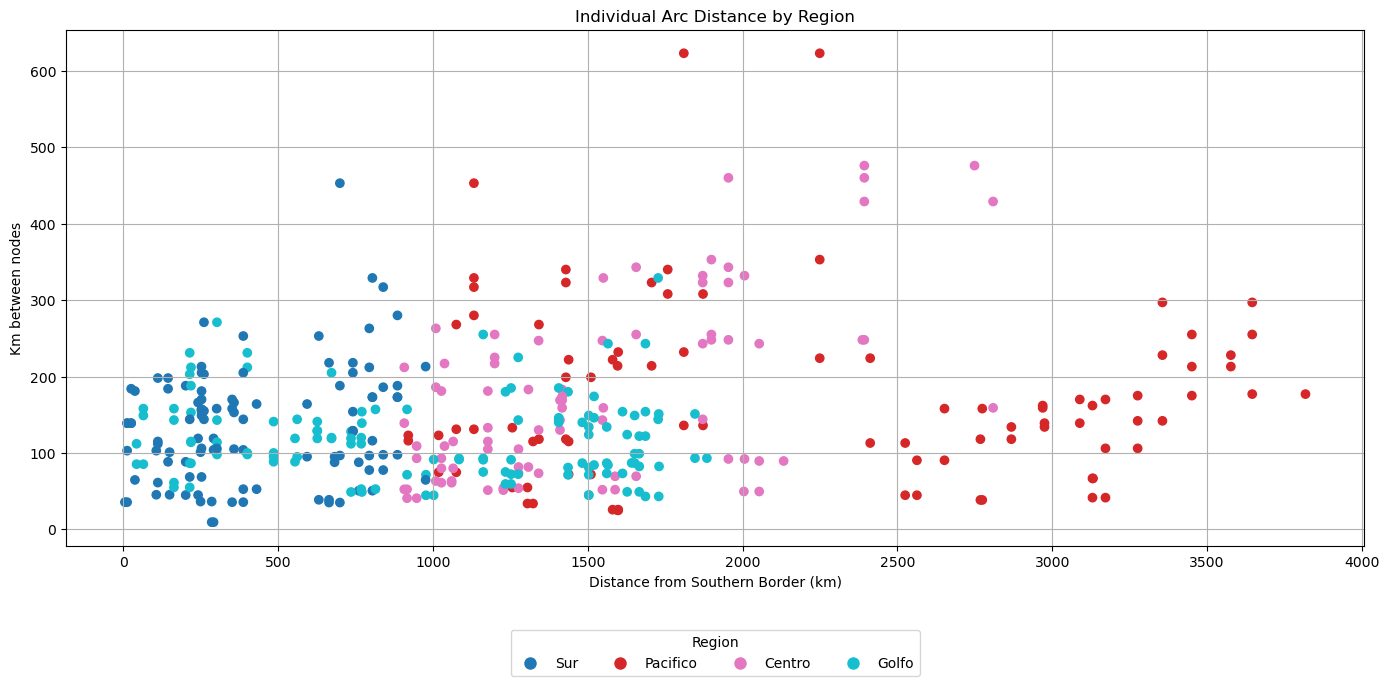

In [67]:
import pandas as pd
import matplotlib.pyplot as plt


# Filtrar los datos para omitir los que tienen 'Desconocido' en la columna 'region'
segmentos_filtered = segmentos[segmentos['region'] != 'Desconocido']

# Obtener los valores únicos de la columna 'region'
unique_regions = segmentos_filtered['region'].unique()

# Crear un mapa de colores basado en el número de regiones únicas
colormap = plt.cm.get_cmap('tab10', len(unique_regions))

# Crear un diccionario para asignar un color a cada región
region_colors = {region: colormap(i) for i, region in enumerate(unique_regions)}

# Asignar colores a cada punto basado en su 'region'
colors = segmentos_filtered['region'].map(region_colors)

# Configurar el tamaño de la figura según sea necesario
plt.figure(figsize=(14, 7))

# Crear el scatter plot
plt.scatter(segmentos_filtered['distance_k'], segmentos_filtered['distancia_'], c=colors, marker='o', label='Total Vulnerability by Region')

# Añadir detalles al gráfico
plt.title('Individual Arc Distance by Region')
plt.xlabel('Distance from Southern Border (km)')
plt.ylabel('Km between nodes')
plt.grid(True)  # Añadir una cuadrícula para mejorar la legibilidad

# Crear una leyenda
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap(i), markersize=10, label=region) for i, region in enumerate(unique_regions)]
plt.legend(handles=handles, title='Region', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(unique_regions))

# Ajustar el layout para evitar que la leyenda se corte
plt.tight_layout()

# Mostrar la gráfica
plt.show()


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_982/1921591644.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=segmentos_filtered, x='region', y='distancia_', palette='Pastel1')


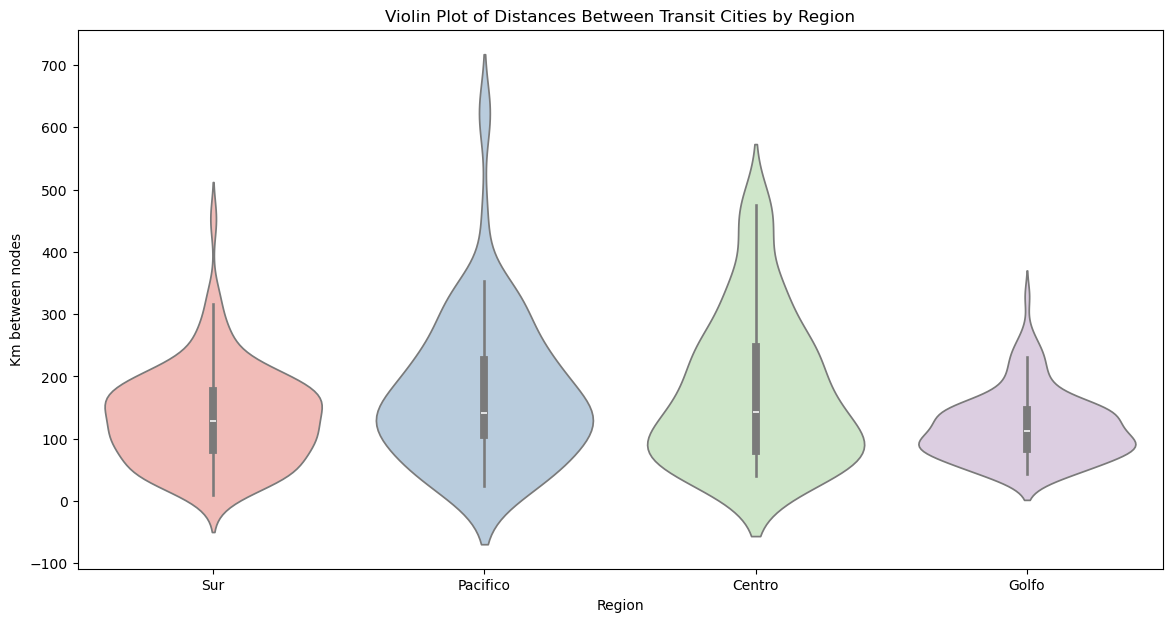

In [71]:
# Configurar el tamaño de la figura
plt.figure(figsize=(14, 7))

# Crear violin plots para cada región
sns.violinplot(data=segmentos_filtered, x='region', y='distancia_', palette='Pastel1')

# Añadir títulos y etiquetas
plt.title('Violin Plot of Distances Between Transit Cities by Region')
plt.xlabel('Region')
plt.ylabel('Km between nodes')
plt.show()

In [48]:
#segmentos.to_file('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/segmentos/segmentos.shp')

/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_73377/242722420.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  segmentos.to_file('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/segmentos/segmentos.shp')


In [6]:
# Renombrar la columna 'ciudad' en values_df a 'Ciudad'
#values_df.rename(columns={'ciudad': 'Ciudad'}, inplace=True)

# Realizar la combinación basada en la columna 'Ciudad'
#segmentos = segmentos.merge(values_df[['Ciudad', 'codigo_unico']], on='Ciudad', how='left')

# Verificar los resultados
#print(segmentos.head(20))

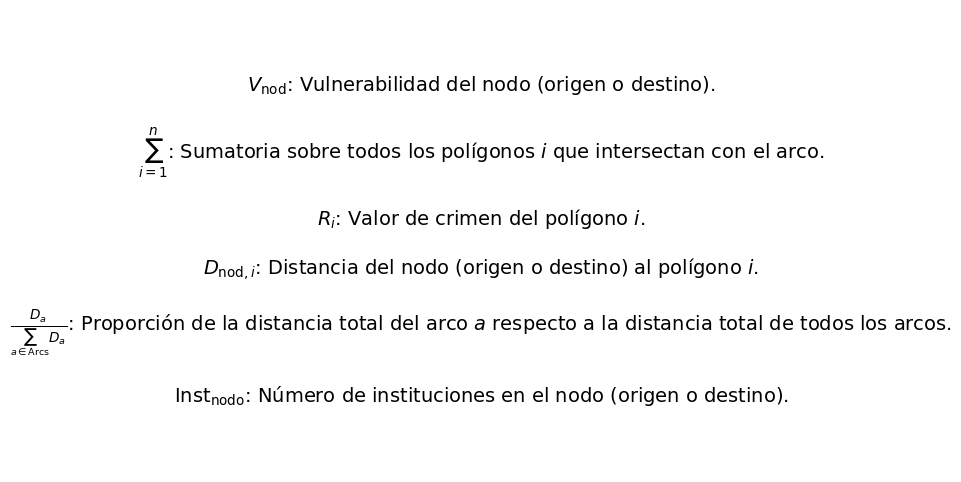

In [47]:
import matplotlib.pyplot as plt

# Define the formula as a LaTeX string with annotations for each symbol using \mathrm instead of \text
formula = r"""
$V_{\mathrm{nod}}$: Vulnerabilidad del nodo (origen o destino).

$\sum_{i=1}^{n}$: Sumatoria sobre todos los polígonos $i$ que intersectan con el arco.

$R_i$: Valor de crimen del polígono $i$.

$D_{\mathrm{nod},i}$: Distancia del nodo (origen o destino) al polígono $i$.

$\frac{D_{a}}{\sum_{a \in \mathrm{Arcs}} D_{a}}$: Proporción de la distancia total del arco $a$ respecto a la distancia total de todos los arcos.

$\mathrm{Inst}_{\mathrm{nodo}}$: Número de instituciones en el nodo (origen o destino).
"""
# Create a figure and axis to display the formula
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust size to fit all text

# Hide the axis
ax.axis('off')

# Display the formula
ax.text(0.5, 0.5, formula, fontsize=14, ha='center', va='center')

# Show the plot
plt.show()


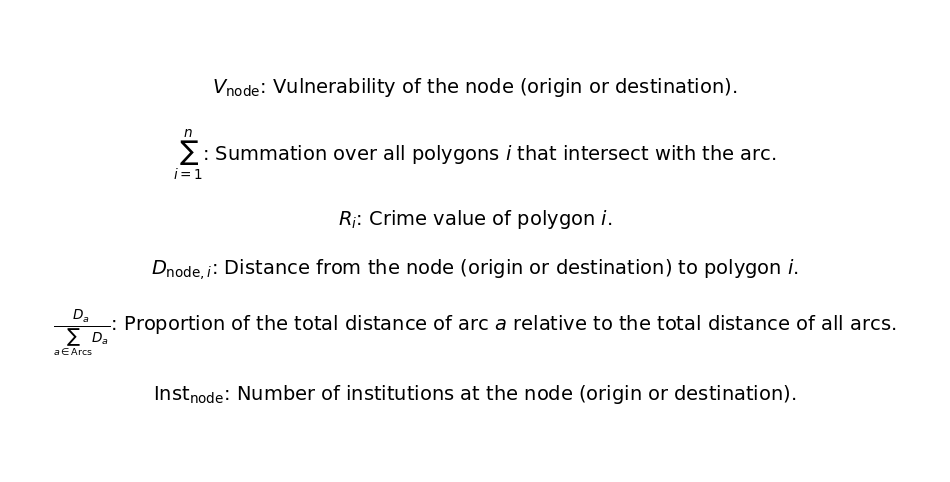

In [12]:


# Define the formula as a LaTeX string with annotations for each symbol using \mathrm instead of \text
formula = r"""
$V_{\mathrm{node}}$: Vulnerability of the node (origin or destination).

$\sum_{i=1}^{n}$: Summation over all polygons $i$ that intersect with the arc.

$R_i$: Crime value of polygon $i$.

$D_{\mathrm{node},i}$: Distance from the node (origin or destination) to polygon $i$.

$\frac{D_{a}}{\sum_{a \in \mathrm{Arcs}} D_{a}}$: Proportion of the total distance of arc $a$ relative to the total distance of all arcs.

$\mathrm{Inst}_{\mathrm{node}}$: Number of institutions at the node (origin or destination).
"""
# Create a figure and axis to display the formula
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust size to fit all text

# Hide the axis
ax.axis('off')

# Display the formula
ax.text(0.5, 0.5, formula, fontsize=14, ha='center', va='center')

# Show the plot
plt.show()

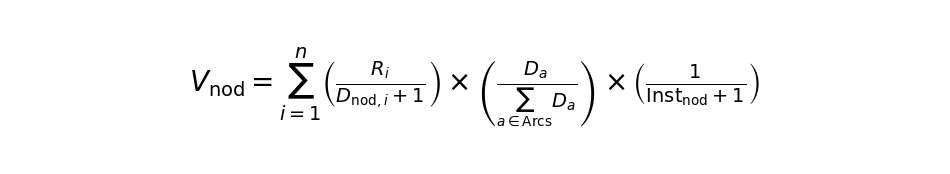

In [41]:
import matplotlib.pyplot as plt

# Define the formula as a LaTeX string with proper sigma notation
formula = r"$V_{\mathrm{nod}} = \sum_{i=1}^{n} \left( \frac{R_i}{D_{\mathrm{nod},i} + 1} \right) \times \left( \frac{D_a}{\sum_{a \in \mathrm{Arcs}} D_a} \right) \times \left( \frac{1}{\mathrm{Inst}_{\mathrm{nod}} + 1} \right)$"


# Create a figure and axis to display the formula
fig, ax = plt.subplots(figsize=(12, 2))

# Hide the axis
ax.axis('off')

# Display the formula
ax.text(0.5, 0.5, formula, fontsize=20, ha='center', va='center')

# Show the plot
plt.show()


In [50]:
arc_df = pd.read_csv("/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/procesamiento de rutas/arcos/arcos_rutas_a_pie.csv")
arc_df.head()

,Unnamed: 0,Arc,ciudad_origen,ciudad_destino,eventos_arco,geometry,distance,duration,distance_km,duration_min
0,0,PG1529-PG1530,"Suchiate, Chiapas","Tapachula, Chiapas",124475,"LINESTRING (-92.23982 14.63441, -92.23938 14.6...",35.6 km,8 hours 8 mins,35.6,488
1,1,PG1530-PG1491,"Tapachula, Chiapas","Mapastepec, Chiapas",98522,"LINESTRING (-92.26123 14.90446, -92.26156 14.9...",103 km,22 hours 57 mins,103.0,1377
2,2,PG1491-PG1492,"Mapastepec, Chiapas","Pijijiapan, Chiapas",11333,"LINESTRING (-92.8986 15.44007, -92.89826 15.44...",45.3 km,10 hours 8 mins,45.3,608
3,3,PG1492-PG1453,"Pijijiapan, Chiapas","Arriaga, Chiapas",31136,"LINESTRING (-93.20811 15.68506, -93.20779 15.6...",101 km,22 hours 36 mins,101.0,1356
4,4,PG1453-PG1414,"Arriaga, Chiapas","Chahuites, Oaxaca",19893,"LINESTRING (-93.90072 16.23439, -93.90258 16.2...",36.4 km,8 hours 9 mins,36.4,489


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_14633/1816850421.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<AxesSubplot:>

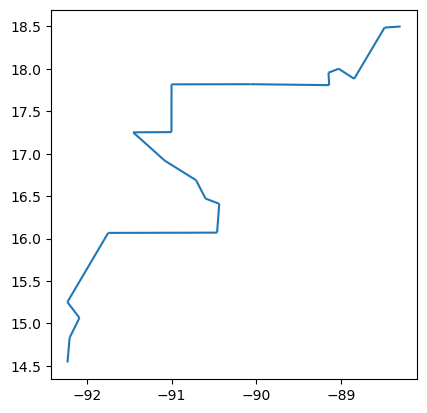

In [5]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mexico = world[world.name == "Mexico"]
guatemala = world[world.name == "Guatemala"]
belize = world[world.name == "Belize"]
mexico_geom = mexico.geometry.iloc[0]
guatemala_geom = guatemala.geometry.iloc[0]
belize_geom = belize.geometry.iloc[0]
frontera_sur_guatemala = mexico_geom.intersection(guatemala_geom)
frontera_sur_belize = mexico_geom.intersection(belize_geom)
fronteras_sur = gpd.GeoDataFrame(geometry=[frontera_sur_guatemala, frontera_sur_belize])
#fronteras_sur.to_file('frontera_sur_mexico.shp')
fronteras_sur.plot()

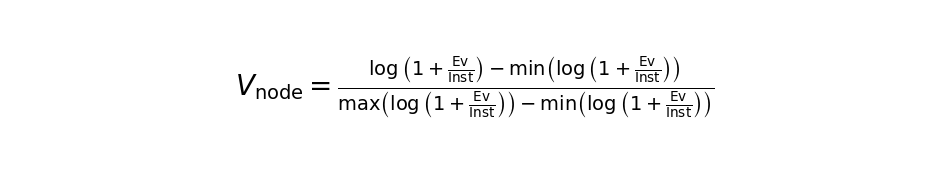

In [13]:
import matplotlib.pyplot as plt

# Define the formula as a LaTeX string
formula = r"$V_{\mathrm{node}} = \frac{\log \left(1 + \frac{\mathrm{Ev}}{\mathrm{Inst}}\right) - \min \left(\log \left(1 + \frac{\mathrm{Ev}}{\mathrm{Inst}}\right)\right)}{\max \left(\log \left(1 + \frac{\mathrm{Ev}}{\mathrm{Inst}}\right)\right) - \min \left(\log \left(1 + \frac{\mathrm{Ev}}{\mathrm{Inst}}\right)\right)}$"

# Create a figure and axis to display the formula
fig, ax = plt.subplots(figsize=(12, 2))

# Hide the axis
ax.axis('off')

# Display the formula
ax.text(0.5, 0.5, formula, fontsize=20, ha='center', va='center')

# Show the plot
plt.show()



# costos

In [2]:
df = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/df_valores_rutas.csv')

In [13]:
df.head(2)

,nombre,Ciudad,estado,geometry_xy,region,ID_Poligono,codigo_unico,eventos,eventos_in_grid,inm_30km,inm_in_grid,inm_in_estado,sc_30km,sc_in_grid,sc_in_estado,distance_km,rellenado,log_eventos_per_inm_30km,norm_log_eventos_per_inm_30km,eventos_per_inm_30km
0,"Tapachula, Chiapas","Tapachula, Chiapas",Chiapas,POINT (-92.2609265 14.9042905),Sur,PG1530,S-PG1530-8,98486,142180,2,4,13,17,11,35,11.8,False,10.804543,0.0,49243.0
1,"Huimanguillo, Tabasco","Huimanguillo, Tabasco",Tabasco,POINT (-93.6634408051158 17.7620967),Golfo,PG1456,G-PG1456-1,97523,97523,0,0,3,0,0,0,302.0,False,inf,NaN,inf


### instituciones

- necesito actualizar la lista y eliminar repetidos, necesito aumentar el tamaño de la lista

In [4]:
directorio_full = pd.read_csv('/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/instituciones/SC/instituciones_sc_1.csv')

In [12]:
directorio_full.head(2)

,name,ciudad,estado,tipo,subtipo,latitud,longitud,direccion,ID_Poligono,geometry_xy
0,Angeles Sin Fronteras,"Mexicali, Baja California",Baja California,OSC / ONG,Centros de Asistencia Social,32.662937,-115.494983,"Av. Reforma 244, Altos Zona Centro C.P.21100",PG268,POINT (-115.4949834 32.66293698)
1,Centro de Apoyo al Trabajor Migrante,"Mexicali, Baja California",Baja California,OSC / ONG,Centros de Asistencia Social,32.660848,-115.479494,"Jabonera 6, Col. Nueva C.P. 21100",PG268,POINT (-115.4794935 32.66084772)


In [8]:
import geopandas as gpd
from shapely.geometry import Point

directorio_full['geometry_xy'] = directorio_full.apply(lambda row: Point(row['longitud'], row['latitud']), axis=1)

directorio_full_gdf = gpd.GeoDataFrame(directorio_full, geometry='geometry_xy')


In [26]:
from shapely.geometry import Point
import matplotlib.pyplot as plt
import folium
# Crear un mapa centrado en México
mapa = folium.Map(location=[23.6345, -102.5528], zoom_start=5)

# Añadir puntos al mapa
for idx, row in directorio_full_gdf.iterrows():
    folium.Marker([row['latitud'], row['longitud']],
                  popup=row['name']).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save('mapa_instituciones.html')

# Mostrar el mapa en un notebook (si estás usando Jupyter)
#mapa

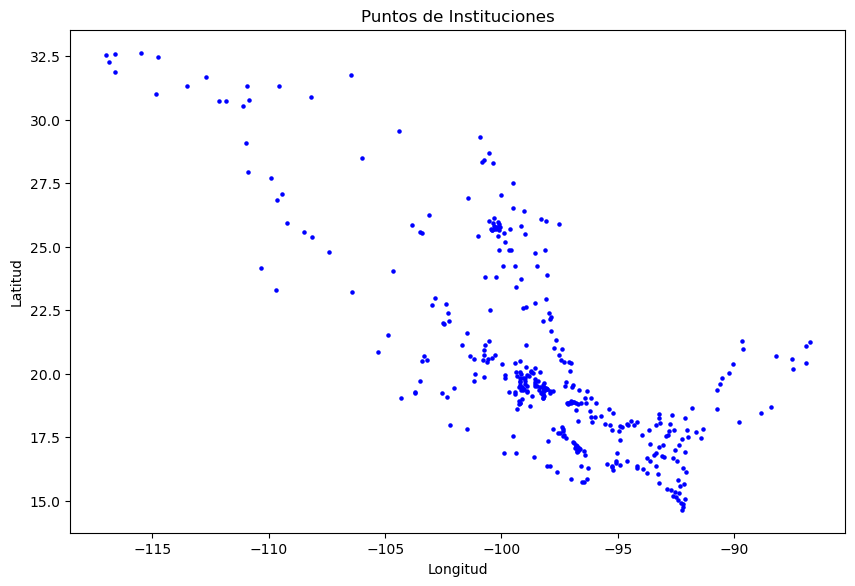

In [25]:
# Visualizar el GeoDataFrame en un mapa
fig, ax = plt.subplots(figsize=(10, 10))
df_filtered_gdf.plot(ax=ax, color='blue', markersize=5)

# Personalizar el mapa
ax.set_title('Puntos de Instituciones')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show()

In [27]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Filtrar el dataframe 'df' para conservar solo las columnas deseadas
df_filtered = df[['nombre', 'Ciudad', 'estado', 'geometry_xy', 'region', 'codigo_unico']]

# Convertir la columna 'geometry_xy' de cadena a objetos Point, si es necesario
def convert_to_point(geom):
    if isinstance(geom, str):
        # Extraer las coordenadas del string
        geom = geom.replace('POINT (', '').replace(')', '')
        lon, lat = map(float, geom.split())
        return Point(lon, lat)
    return geom

df_filtered['geometry_xy'] = df_filtered['geometry_xy'].apply(convert_to_point)

# Convertir el DataFrame a GeoDataFrame
df_filtered_gdf = gpd.GeoDataFrame(df_filtered, geometry='geometry_xy')

# Configurar el sistema de coordenadas (CRS)
df_filtered_gdf.set_crs(epsg=4326, inplace=True)

# Función para crear un polígono circular de 30 km de diámetro alrededor de un punto
def create_buffer(point, distance_km):
    # Convertir la distancia de km a metros
    distance_meters = distance_km * 1000
    return point.buffer(distance_meters / 111320)  # Aproximadamente 1 grado de latitud = 111.32 km

# Aplicar la función a cada punto en la columna 'geometry_xy'
df_filtered_gdf['buffer_30km'] = df_filtered_gdf['geometry_xy'].apply(lambda x: create_buffer(x, 30))



/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_982/538715393.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['geometry_xy'] = df_filtered['geometry_xy'].apply(convert_to_point)
/Users/pablouriarte/opt/anaconda3/lib/python3.9/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


In [28]:
df_filtered_gdf.head()

,nombre,Ciudad,estado,geometry_xy,region,codigo_unico,buffer_30km
0,"Tapachula, Chiapas","Tapachula, Chiapas",Chiapas,POINT (-92.26093 14.90429),Sur,S-PG1530-8,"POLYGON ((-91.99143 14.90429, -91.99273 14.877..."
1,"Huimanguillo, Tabasco","Huimanguillo, Tabasco",Tabasco,POINT (-93.66344 17.76210),Golfo,G-PG1456-1,"POLYGON ((-93.39395 17.76210, -93.39525 17.735..."
2,"Centro, Tabasco","Centro, Tabasco",Tabasco,POINT (-92.77479 18.02716),Golfo,G-PG1495-6,"POLYGON ((-92.50530 18.02716, -92.50660 18.000..."
3,"Acayucan, Veracruz","Acayucan, Veracruz",Veracruz,POINT (-94.91458 17.94879),Golfo,G-PG1378-4,"POLYGON ((-94.64508 17.94879, -94.64638 17.922..."
4,"Tenosique, Tabasco","Tenosique, Tabasco",Tabasco,POINT (-91.42202 17.47071),Golfo,G-PG1572-3,"POLYGON ((-91.15253 17.47071, -91.15383 17.444..."


In [37]:
# Crear un DataFrame vacío para los resultados
df_costos = pd.DataFrame()

# Iterar sobre cada fila de df_filtered_gdf
for idx, row in df_filtered_gdf.iterrows():
    buffer = row['buffer_30km']
    
    # Buscar puntos en directorio_full_gdf que estén dentro del buffer
    points_within_buffer = directorio_full_gdf[directorio_full_gdf['geometry_xy'].within(buffer)]
    
    # Crear un DataFrame con la fila actual de df_filtered_gdf
    row_df = pd.DataFrame([row])
    
    # Añadir las filas encontradas a df_costos debajo de la fila actual de df_filtered_gdf
    df_costos = pd.concat([df_costos, row_df, points_within_buffer], ignore_index=True)

# Mostrar el DataFrame resultante
print(df_costos.head(20))

                   nombre                 Ciudad   estado  \
0      Tapachula, Chiapas     Tapachula, Chiapas  Chiapas   
1                     NaN                    NaN  Chiapas   
2                     NaN                    NaN  Chiapas   
3                     NaN                    NaN  Chiapas   
4                     NaN                    NaN  Chiapas   
5                     NaN                    NaN  Chiapas   
6                     NaN                    NaN  Chiapas   
7                     NaN                    NaN  Chiapas   
8                     NaN                    NaN  Chiapas   
9                     NaN                    NaN  Chiapas   
10                    NaN                    NaN  Chiapas   
11                    NaN                    NaN  Chiapas   
12                    NaN                    NaN  Chiapas   
13                    NaN                    NaN  Chiapas   
14                    NaN                    NaN  Chiapas   
15                    Na

In [47]:
from shapely.geometry import LineString

df_costos_gdf = gpd.GeoDataFrame(df_costos, geometry='geometry_xy')

df_costos_gdf['linea'] = None

last_valid_row = None

# Iterar sobre cada fila en df_costos_gdf
for idx, row in df_costos_gdf.iterrows():
    if pd.isna(row['codigo_unico']):
        if last_valid_row is not None:
            # Crear una línea desde la fila actual hasta la última fila válida
            line = LineString([last_valid_row['geometry_xy'], row['geometry_xy']])
            df_costos_gdf.at[idx, 'linea'] = line
    else:
        # Actualizar la última fila válida
        last_valid_row = row

In [53]:
df_costos_gdf
#/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/instituciones

,nombre,Ciudad,estado,region,codigo_unico,name,ciudad,tipo,subtipo,latitud,longitud,direccion,ID_Poligono,linea
0,"Tapachula, Chiapas","Tapachula, Chiapas",Chiapas,Sur,S-PG1530-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,NaN,NaN,Chiapas,NaN,NaN,Albergue infantil La Esperanza,"Tapachula, Chiapas",OSC / ONG,Centros de Asistencia Social,14.924906,-92.256080,"3ra. Calle Ote. #37, Col. Centro C.P. 30830,Ta...",PG1530,"LINESTRING (-92.2609265 14.9042905, -92.256080..."
2,NaN,NaN,Chiapas,NaN,NaN,"Centro de Atencion a ninas, ninos y jovenes mi...","Tapachula, Chiapas",OSC / ONG,Centros de Asistencia Social,14.918504,-92.251466,"Calle Quinta, Privada sur #29, esquina 4ta Ori...",PG1530,"LINESTRING (-92.2609265 14.9042905, -92.251465..."
3,NaN,NaN,Chiapas,NaN,NaN,Todo por Ellos,"Tapachula, Chiapas",OSC / ONG,Centros de Asistencia Social,14.912974,-92.268089,"Calle 14 Norte 30, Col. Centro C.P. 30700",PG1530,"LINESTRING (-92.2609265 14.9042905, -92.268089..."
4,NaN,NaN,Chiapas,NaN,NaN,Albergue Municipal para Ninas y Ninos Migrantes,"Tapachula, Chiapas",OSC / ONG,Centros de Asistencia Social,14.910549,-92.270067,"6a. Norte y 19a. Poniente, Col. Centro Tapachu...",PG1530,"LINESTRING (-92.2609265 14.9042905, -92.270066..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,NaN,NaN,Estado de Mexico,NaN,NaN,Centro Fray Julian Garces A. C.,"Texcoco, Estado de Mexico",OSC / ONG,Centros de Asistencia Social,19.311676,-98.244207,"Calle 11 No. 214,Loma Xicohtencatl, Tlaxcala",PG1224,"LINESTRING (-98.167778 19.348889, -98.2442069 ..."
1763,NaN,NaN,Estado de Mexico,NaN,NaN,San Felipe Hueyotlipan,"Texcoco, Estado de Mexico",OSC / ONG,Centros de Asistencia Social,19.085963,-98.210975,"Calle 5 de Febrero 1, Col. San Felipe Hueyotli...",PG1223,"LINESTRING (-98.167778 19.348889, -98.2109754 ..."
1764,"Chicomuselo, Chiapas","Chicomuselo, Chiapas",Chiapas,Sur,S-PG1531-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1765,"Carlos A. Carrillo, Veracruz","Carlos A. Carrillo, Veracruz",Veracruz,Golfo,G-PG1339-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [58]:
# Asignar CRS al GeoDataFrame original
#df_costos_gdf.set_crs(epsg=4326, inplace=True)

In [56]:
# Convertir df_costos_gdf a un GeoDataFrame nuevamente (por si acaso)
df_costos_gdf = gpd.GeoDataFrame(df_costos_gdf, geometry='linea', crs="EPSG:4326")

# Definir el sistema de coordenadas proyectado (UTM) que se utilizará para medir en metros
utm_crs = "EPSG:32614"  # UTM Zone 14N, por ejemplo. Debes ajustar esto según tu área de interés.

# Convertir el GeoDataFrame a UTM
df_costos_gdf_utm = df_costos_gdf.to_crs(utm_crs)

# Crear una nueva columna para las distancias
df_costos_gdf_utm['distancia_metros'] = None

# Calcular la distancia en metros para cada fila con un valor en 'linea'
for idx, row in df_costos_gdf_utm.iterrows():
    if row['linea'] is not None:
        df_costos_gdf_utm.at[idx, 'distancia_metros'] = row['linea'].length

# Convertir de nuevo al CRS original (EPSG:4326)
df_costos_gdf_final = df_costos_gdf_utm.to_crs(epsg=4326)






In [59]:
# Crear una columna 'group_id' para identificar los grupos de filas
group_id = 0
group_ids = []
nan_counts = []
nan_count = 0

for idx, row in df_costos_gdf_final.iterrows():
    if pd.isna(row['codigo_unico']):
        group_ids.append(group_id)
        nan_count += 1
    else:
        if idx != 0:
            # Asignar el conteo de NaNs al grupo anterior
            for _ in range(nan_count):
                nan_counts.append(nan_count)
            nan_counts.append(0)
        group_id += 1
        group_ids.append(group_id)
        nan_count = 0

# Asignar el conteo de NaNs al último grupo
for _ in range(nan_count):
    nan_counts.append(nan_count)
nan_counts.append(0)

# Añadir las columnas 'group_id' y 'nan_count' al GeoDataFrame
df_costos_gdf_final['group_id'] = group_ids
df_costos_gdf_final['nan_count'] = nan_counts

In [60]:
df_costos_gdf_final

,nombre,Ciudad,estado,region,codigo_unico,name,ciudad,tipo,subtipo,latitud,longitud,direccion,ID_Poligono,linea,distancia_metros,group_id,nan_count
0,"Tapachula, Chiapas","Tapachula, Chiapas",Chiapas,Sur,S-PG1530-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,1,17
1,NaN,NaN,Chiapas,NaN,NaN,Albergue infantil La Esperanza,"Tapachula, Chiapas",OSC / ONG,Centros de Asistencia Social,14.924906,-92.256080,"3ra. Calle Ote. #37, Col. Centro C.P. 30830,Ta...",PG1530,"LINESTRING (-92.26093 14.90429, -92.25608 14.9...",2354.213605,1,17
2,NaN,NaN,Chiapas,NaN,NaN,"Centro de Atencion a ninas, ninos y jovenes mi...","Tapachula, Chiapas",OSC / ONG,Centros de Asistencia Social,14.918504,-92.251466,"Calle Quinta, Privada sur #29, esquina 4ta Ori...",PG1530,"LINESTRING (-92.26093 14.90429, -92.25147 14.9...",1884.903102,1,17
3,NaN,NaN,Chiapas,NaN,NaN,Todo por Ellos,"Tapachula, Chiapas",OSC / ONG,Centros de Asistencia Social,14.912974,-92.268089,"Calle 14 Norte 30, Col. Centro C.P. 30700",PG1530,"LINESTRING (-92.26093 14.90429, -92.26809 14.9...",1239.256213,1,17
4,NaN,NaN,Chiapas,NaN,NaN,Albergue Municipal para Ninas y Ninos Migrantes,"Tapachula, Chiapas",OSC / ONG,Centros de Asistencia Social,14.910549,-92.270067,"6a. Norte y 19a. Poniente, Col. Centro Tapachu...",PG1530,"LINESTRING (-92.26093 14.90429, -92.27007 14.9...",1210.127572,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,NaN,NaN,Estado de Mexico,NaN,NaN,Centro Fray Julian Garces A. C.,"Texcoco, Estado de Mexico",OSC / ONG,Centros de Asistencia Social,19.311676,-98.244207,"Calle 11 No. 214,Loma Xicohtencatl, Tlaxcala",PG1224,"LINESTRING (-98.16778 19.34889, -98.24421 19.3...",9023.293901,386,4
1763,NaN,NaN,Estado de Mexico,NaN,NaN,San Felipe Hueyotlipan,"Texcoco, Estado de Mexico",OSC / ONG,Centros de Asistencia Social,19.085963,-98.210975,"Calle 5 de Febrero 1, Col. San Felipe Hueyotli...",PG1223,"LINESTRING (-98.16778 19.34889, -98.21098 19.0...",29447.676253,386,0
1764,"Chicomuselo, Chiapas","Chicomuselo, Chiapas",Chiapas,Sur,S-PG1531-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,387,0
1765,"Carlos A. Carrillo, Veracruz","Carlos A. Carrillo, Veracruz",Veracruz,Golfo,G-PG1339-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,388,0


In [61]:
# Guardar el resultado en el archivo Shapefile en el path especificado
output_path_shp = '/Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/instituciones/df_costos_with_distances.shp'
df_costos_gdf_final.to_file(output_path_shp, driver='ESRI Shapefile')

# Confirmar la ruta de guardado
print(f"GeoDataFrame guardado en: {output_path_shp}")


/var/folders/68/6zkv8z4j4rl6ds90br2rb7ph0000gn/T/ipykernel_982/3103232351.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_costos_gdf_final.to_file(output_path_shp, driver='ESRI Shapefile')


GeoDataFrame guardado en: /Users/pablouriarte/Mapa_Migracion_Irregular_Mexico_Fresh/1. Mapas/1. Mapas/Metodo_1/instituciones/df_costos_with_distances.shp


In [12]:
# Load and prepare data
sub_dfval = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\df_valores.csv')
sub_dfval = sub_dfval.sort_values(by='eventos', ascending=False).reset_index(drop=True)
sub_dfval['geometry'] = sub_dfval['geometry'].apply(wkt.loads)
sub_dfval = gpd.GeoDataFrame(sub_dfval, geometry='geometry')
sub_dfval['buffer'] = sub_dfval['geometry'].buffer(30 / 110.574)  # Convert radius to degrees



In [13]:
import geopandas as gpd
import pandas as pd
from shapely import wkt

def place_facilities(df, num_facilities):
    # Work with a copy to preserve original df
    df_copy = df.copy()
    facilities = gpd.GeoDataFrame(columns=['geometry'], crs=df.crs)
    covered_indices = []

    for _ in range(num_facilities):
        max_uncovered_demand = 0
        best_facility = None
        best_idx = None

        # Find the city with the highest demand that is not already covered
        for idx, row in df_copy.iterrows():
            if idx not in covered_indices:
                current_demand = df_copy.loc[df_copy['buffer'].intersects(row['geometry']), 'eventos'].sum()
                if current_demand > max_uncovered_demand:
                    max_uncovered_demand = current_demand
                    best_facility = row['geometry']
                    best_idx = idx

        if best_facility is not None:
            # Create a GeoDataFrame for the new facility
            new_facility_gdf = gpd.GeoDataFrame([[best_facility]], columns=['geometry'], crs=df.crs)
            # Concatenate the new facility to the existing facilities GeoDataFrame
            facilities = pd.concat([facilities, new_facility_gdf], ignore_index=True)
            # Add covered cities' indices
            covered_indices += list(df_copy.loc[df_copy['buffer'].intersects(best_facility)].index)

    return facilities, covered_indices

def run_experiments(df, start, end, increment):
    results = {}
    for num_facilities in range(start, end + 1, increment):
        facilities, covered_indices = place_facilities(df, num_facilities)
        df[f'fac_30kopt{num_facilities}'] = df.index.isin(covered_indices).astype(int)
        results[num_facilities] = facilities

    return df, results

# Run the experiments
sub_dfval_updated, experiment_results = run_experiments(sub_dfval, 57, 127, 10)

# Check the results
print(sub_dfval_updated.head())
for num, facilities in experiment_results.items():
    print(f"Experiment with {num} facilities:")
    print(facilities)


   Unnamed: 0                 nommun   cvemun    estado region id_poligon  \
0         269  Huimanguillo, Tabasco  27008.0   Tabasco    Sur     PG1456   
1         270        Centro, Tabasco  27004.0   Tabasco    Sur     PG1495   
2          21     Tapachula, Chiapas   7089.0   Chiapas    Sur     PG1530   
3         271     Tenosique, Tabasco  27017.0   Tabasco    Sur     PG1572   
4         329     Acayucan, Veracruz      NaN  Veracruz  Golfo     PG1378   

   eventos  inm_30km  sc_30km                    geometry  \
0  86684.0         0        0  POINT (-93.66344 17.76210)   
1  74160.0         1        7  POINT (-92.77479 18.02716)   
2  70665.0         2       67  POINT (-92.26093 14.90429)   
3  39620.0         1       34  POINT (-91.42202 17.47071)   
4  36446.0         1       25  POINT (-94.91458 17.94879)   

                                              buffer  fac_30kopt57  \
0  POLYGON ((-93.39213 17.76210, -93.39344 17.735...             1   
1  POLYGON ((-92.50348 18.0271

In [64]:
dfval



,nommun,region,eventos,sc_30km,distancia_km,latitud,geometry,sum_R1_R2_,R4,R
0,"Tapachula, Chiapas",Sur,70665.0,67,15.537,14.904291,POINT (-92.2609265 14.9042905),0.425404,0.470409,0.447906
1,"Huimanguillo, Tabasco",Sur,86684.0,0,325.527,17.762097,POINT (-93.6634408051158 17.7620967),0.102185,0.497342,0.299763
2,"Centro, Tabasco",Sur,74160.0,7,224.089,18.027159,POINT (-92.7747911804616 18.0271588),1.192250,0.469173,0.830711
4,"Tenosique, Tabasco",Sur,39620.0,34,42.334,17.470713,POINT (-91.4220212 17.4707129),0.360015,0.496657,0.428336
5,"Macuspana, Tabasco",Sur,31739.0,3,177.427,17.760922,POINT (-92.596108 17.760922),0.272972,0.495978,0.384475
...,...,...,...,...,...,...,...,...,...,...
392,"San Juan Huactzinco, Tlaxcala",Centro,1.0,45,879.483,19.232933,POINT (-98.2520375 19.2329326),0.030000,0.174829,0.102414
393,"Amaxac de Guerrero, Tlaxcala",Centro,1.0,11,898.212,19.348889,POINT (-98.167778 19.348889),0.030000,0.153340,0.091670
394,"Amaxac de Guerrero, Tlaxcala",Centro,1.0,11,898.212,19.348889,POINT (-98.167778 19.348889),0.030000,0.153340,0.091670
395,"Chicomuselo, Chiapas",Sur,NaN,0,85.686,15.793552,POINT (-92.4192662013789 15.7935524),0.030000,0.497432,0.263716


In [52]:
dfval = dfvalores[['nommun','region', 'eventos','sc_30km','distancia_km','latitud','geometry']]

In [56]:
dfval = dfval.merge(mun_shp[['nommun', 'sum_R1_R2_','R4']], on='nommun', how='left')

In [59]:
dfval['R'] = (dfval['R4'] + dfval['sum_R1_R2_']) / 2

In [66]:
dfval = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\UFLP\\sc\\dfval.shp')

In [58]:
#mun_shp.to_csv("C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\areas\\municipiosrisk1.csv")
#dfvalores = pd.read_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\1. Mapas\\1. Mapas\\Metodo_1\\df_valores_rutas.csv')


In [45]:
#mun_shp = mun_shp.merge(dfvalores[['nommun', 'eventos','sc_30km','distancia_km',]], on='nommun', how='left')

In [54]:
mun_shp

,nommun,cvemun,nomedo,area,R1,R2,R3,R4,R4pt,region,sum_R1_R2_,geometry
0,"Aguascalientes, Aguascalientes",1001,Aguascalientes,1168.762384,0.360084,0.372695,0.117251,0.662296,0.000458,Centro,0.850030,"POLYGON ((-11370403.590 2520317.662, -11368883..."
1,"Asientos, Aguascalientes",1002,Aguascalientes,547.762077,0.019696,0.011381,0.017855,0.745202,0.000515,Centro,0.048932,"POLYGON ((-11368305.122 2546014.561, -11367916..."
2,"Calvillo, Aguascalientes",1003,Aguascalientes,931.300088,0.019349,0.013107,0.013835,0.708078,0.000489,Centro,0.046292,"POLYGON ((-11444356.824 2510725.426, -11444212..."
3,"Cosio, Aguascalientes",1004,Aguascalientes,128.907513,0.012770,0.010345,0.012474,0.704691,0.000487,Centro,0.035590,"POLYGON ((-11387740.145 2566722.259, -11387556..."
4,"El Llano, Aguascalientes",1010,Aguascalientes,500.861359,0.012770,0.012417,0.011113,0.710027,0.000491,Centro,0.036300,"POLYGON ((-11365483.996 2514328.561, -11364488..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2475,"Villa Gonzalez Ortega, Zacatecas",32053,Zacatecas,417.529939,0.011385,0.010000,0.010309,0.743417,0.000514,Centro,0.031694,"POLYGON ((-11348605.030 2589714.729, -11348882..."
2476,"Villa Hidalgo, Zacatecas",32054,Zacatecas,355.528477,0.010346,0.010345,0.010928,0.747821,0.000517,Centro,0.031619,"POLYGON ((-11316391.676 2571964.813, -11316227..."
2477,"Villa de Cos, Zacatecas",32051,Zacatecas,6405.541210,0.014502,0.010691,0.011175,0.749266,0.000518,Centro,0.036367,"POLYGON ((-11435339.198 2727602.823, -11434798..."
2478,"Villanueva, Zacatecas",32055,Zacatecas,2158.696446,0.015194,0.013107,0.011856,0.747771,0.000517,Centro,0.040157,"POLYGON ((-11442165.843 2592830.025, -11441393..."
